# Source Overview

This notebook analyses the sources extracted from notes in regards to bias, type and factuality (RQ1 in the paper)

## Loading the source data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sources = pd.read_excel('annotated_sources.xlsx')

In [4]:
sources.head()

,url,frequency,merged_urls,country,type,bias (MBFC),bias (AS),bias (AF),bias (final),factuality (MBFC),reliability (AF)
0,twitter.com,60168,"['pic.twitter.com', 'ads.twitter.com', 'blog.t...",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN
1,wikipedia.org,39750,"['m.wikipedia.org', 'th.m.wikipedia.org', 'lt....",USA,Dictionary/Encyclopedia,Least Biased,NaN,NaN,Center,Mixed Factuality,NaN
2,x.com,23052,"['ads.x.com', 'help.x.com', 'business.x.com', ...",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN
3,youtube.com,18370,"['m.youtube.com', 'tv.youtube.com', 'music.you...",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN
4,bbc.co.uk,10522,"['bbc.com', 'news.bbc.co.uk', 'genome.ch.bbc.c...",GBR,News,Left-Center,Center,Middle,Center,High Factuality,"Reliable, Analysis/Fact Reporting"


In [5]:
len(sources)

44523

In [6]:
sources.frequency.sum()

648312

In [7]:
import ast
sources['merged_urls'] = sources['merged_urls'].fillna("[]").apply(ast.literal_eval)

sources['url count'] = sources['merged_urls'].apply(len) + 1

sources.head()

,url,frequency,merged_urls,country,type,bias (MBFC),bias (AS),bias (AF),bias (final),factuality (MBFC),reliability (AF),url count
0,twitter.com,60168,"[pic.twitter.com, ads.twitter.com, blog.twitte...",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN,21
1,wikipedia.org,39750,"[m.wikipedia.org, th.m.wikipedia.org, lt.wikip...",USA,Dictionary/Encyclopedia,Least Biased,NaN,NaN,Center,Mixed Factuality,NaN,83
2,x.com,23052,"[ads.x.com, help.x.com, business.x.com, commun...",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN,5
3,youtube.com,18370,"[m.youtube.com, tv.youtube.com, music.youtube....",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN,7
4,bbc.co.uk,10522,"[bbc.com, news.bbc.co.uk, genome.ch.bbc.co.uk,...",GBR,News,Left-Center,Center,Middle,Center,High Factuality,"Reliable, Analysis/Fact Reporting",5


In [8]:
sources[:500]["url count"].sum()

4064

## Looking at top 3 sources per type category

In [9]:
total_frequency_per_type = sources.groupby('type')['frequency'].sum().reset_index(name='total_frequency')

top_3_per_type = sources.groupby('type').apply(lambda x: x.nlargest(3, 'frequency')).reset_index(drop=True)

top_3_with_total = top_3_per_type.merge(total_frequency_per_type, on='type', how='left')

top_3_with_total['percentage_of_total'] = (top_3_with_total['frequency'] / top_3_with_total['total_frequency']) * 100

top_3_with_total

,url,frequency,merged_urls,country,type,bias (MBFC),bias (AS),bias (AF),bias (final),factuality (MBFC),reliability (AF),url count,total_frequency,percentage_of_total
0,wikipedia.org,39750,"[m.wikipedia.org, th.m.wikipedia.org, lt.wikip...",USA,Dictionary/Encyclopedia,Least Biased,NaN,NaN,Center,Mixed Factuality,NaN,83,45286,87.775471
1,britannica.com,1862,"[cdn.britannica.com, kids.britannica.com]",USA,Dictionary/Encyclopedia,Pro-science,NaN,NaN,Center,High Factuality,NaN,3,45286,4.111646
2,merriam-webster.com,1069,[],USA,Dictionary/Encyclopedia,NaN,NaN,NaN,NaN,NaN,NaN,1,45286,2.360553
3,snopes.com,3937,"[media.snopes.com, mediaproxy.snopes.com]",USA,Fact-checking,Left-Center,Lean Left,Middle,Left-Center,Mostly Factual,"Reliable, Analysis/Fact Reporting",3,12410,31.724416
4,politifact.com,2658,[api.politifact.com],USA,Fact-checking,Left-Center,Lean Left,Middle,Left-Center,High Factuality,"Reliable, Analysis/Fact Reporting",2,12410,21.418211
5,factcheck.org,1505,[cdn.factcheck.org],USA,Fact-checking,Least Biased,Lean Left,Middle,Center,Very High Factuality,"Reliable, Analysis/Fact Reporting",2,12410,12.127317
6,mhlw.go.jp,9436,"[ncd.mhlw.go.jp, ifas.mhlw.go.jp, janis.mhlw.g...",JPN,Government/Civil,NaN,NaN,NaN,NaN,NaN,NaN,17,55649,16.956280
7,who.int,3907,"[id.who.int, inb.who.int, icd.who.int, cdn.who...",INT,Government/Civil,NaN,NaN,NaN,NaN,NaN,NaN,18,55649,7.020791
8,gov.uk,2735,"[sis.gov.uk, orr.gov.uk, mi5.gov.uk, hse.gov.u...",GBR,Government/Civil,NaN,NaN,NaN,NaN,NaN,NaN,168,55649,4.914733
9,bbc.co.uk,10522,"[bbc.com, news.bbc.co.uk, genome.ch.bbc.co.uk,...",GBR,News,Left-Center,Center,Middle,Center,High Factuality,"Reliable, Analysis/Fact Reporting",5,167294,6.289526


## Getting counts for all categories of type, bias and factuality

In [10]:
sources.type.value_counts()

type
News                       246
Government/Civil           113
Research                    52
Social Media/Platforms      37
Other                       20
Fact-checking               15
Dictionary/Encyclopedia     11
Search Engine                4
Web Archive                  2
Name: count, dtype: int64

In [11]:
sources["bias (MBFC)"].value_counts()

bias (MBFC)
Left-Center      78
Least Biased     37
Right-Center     35
Pro-science      27
Left             19
Right             9
Extreme Right     1
Name: count, dtype: int64

In [12]:
sources["bias (AS)"].value_counts()

bias (AS)
Lean Left     44
Center        36
Left          14
Lean Right     6
Right          3
Name: count, dtype: int64

In [13]:
sources["bias (AF)"].value_counts()

bias (AF)
Middle          47
Skews Left      20
Strong Left      7
Skews Right      4
Strong Right     2
Name: count, dtype: int64

In [14]:
sources["bias (final)"].value_counts()

bias (final)
Center          73
Left-Center     66
Right-Center    22
Left            14
Right            8
Name: count, dtype: int64

In [15]:
bias_columns = ['bias (MBFC)', 'bias (AS)', 'bias (AF)', 'bias (final)']

In [16]:
all_bias = sources[sources['bias (final)'].notna()]
print(f"All bias source counts: {len(all_bias)}")
print(f"All bias url counts: {all_bias['url count'].sum()}")
print(f"All frequency url counts: {all_bias['frequency'].sum()}")

All bias source counts: 183
All bias url counts: 991
All frequency url counts: 206466


In [17]:
all_fact = all_bias[all_bias['factuality (MBFC)'].notna()]
print(f"All factuality source counts: {len(all_fact)}")
print(f"All factuality url counts: {all_fact['url count'].sum()}")
print(f"All frequency url counts: {all_fact['frequency'].sum()}")

All factuality source counts: 182
All factuality url counts: 990
All frequency url counts: 206007


In [18]:
all_fact.groupby('type')['url count'].sum()

type
Dictionary/Encyclopedia     88
Fact-checking               12
Government/Civil            12
News                       543
Other                        1
Research                   177
Search Engine               67
Social Media/Platforms      90
Name: url count, dtype: int64

In [19]:
all_fact.groupby('bias (final)')['url count'].sum()

bias (final)
Center          422
Left             25
Left-Center     448
Right            16
Right-Center     79
Name: url count, dtype: int64

In [20]:
all_fact.groupby('factuality (MBFC)')['url count'].sum()

factuality (MBFC)
High Factuality         399
Low Factuality            2
Mixed Factuality        227
Mostly Factual          211
Satire                    1
Very High Factuality    150
Name: url count, dtype: int64

In [22]:
aggregated_results = []

def process_bias_column(column_name):
    non_null_rows = sources[sources[column_name].notna()]
    grouped = non_null_rows.groupby(column_name).agg(
        total_frequency=('frequency', 'sum'),
        count=('url count', 'sum')
    ).reset_index().rename(columns={column_name: 'bias_category'})
    grouped['bias_column'] = column_name
    return grouped

for bias_column in bias_columns:
    aggregated_results.append(process_bias_column(bias_column))

final_aggregated_df = pd.concat(aggregated_results, ignore_index=True)

final_aggregated_df

,bias_category,total_frequency,count,bias_column
0,Extreme Right,189,2,bias (MBFC)
1,Least Biased,65595,202,bias (MBFC)
2,Left,11227,49,bias (MBFC)
3,Left-Center,101442,479,bias (MBFC)
4,Pro-science,15659,190,bias (MBFC)
5,Right,5727,16,bias (MBFC)
6,Right-Center,16990,110,bias (MBFC)
7,Center,39464,91,bias (AS)
8,Lean Left,75021,262,bias (AS)
9,Lean Right,3945,8,bias (AS)


## Plotting type, bias and factuality class distributions

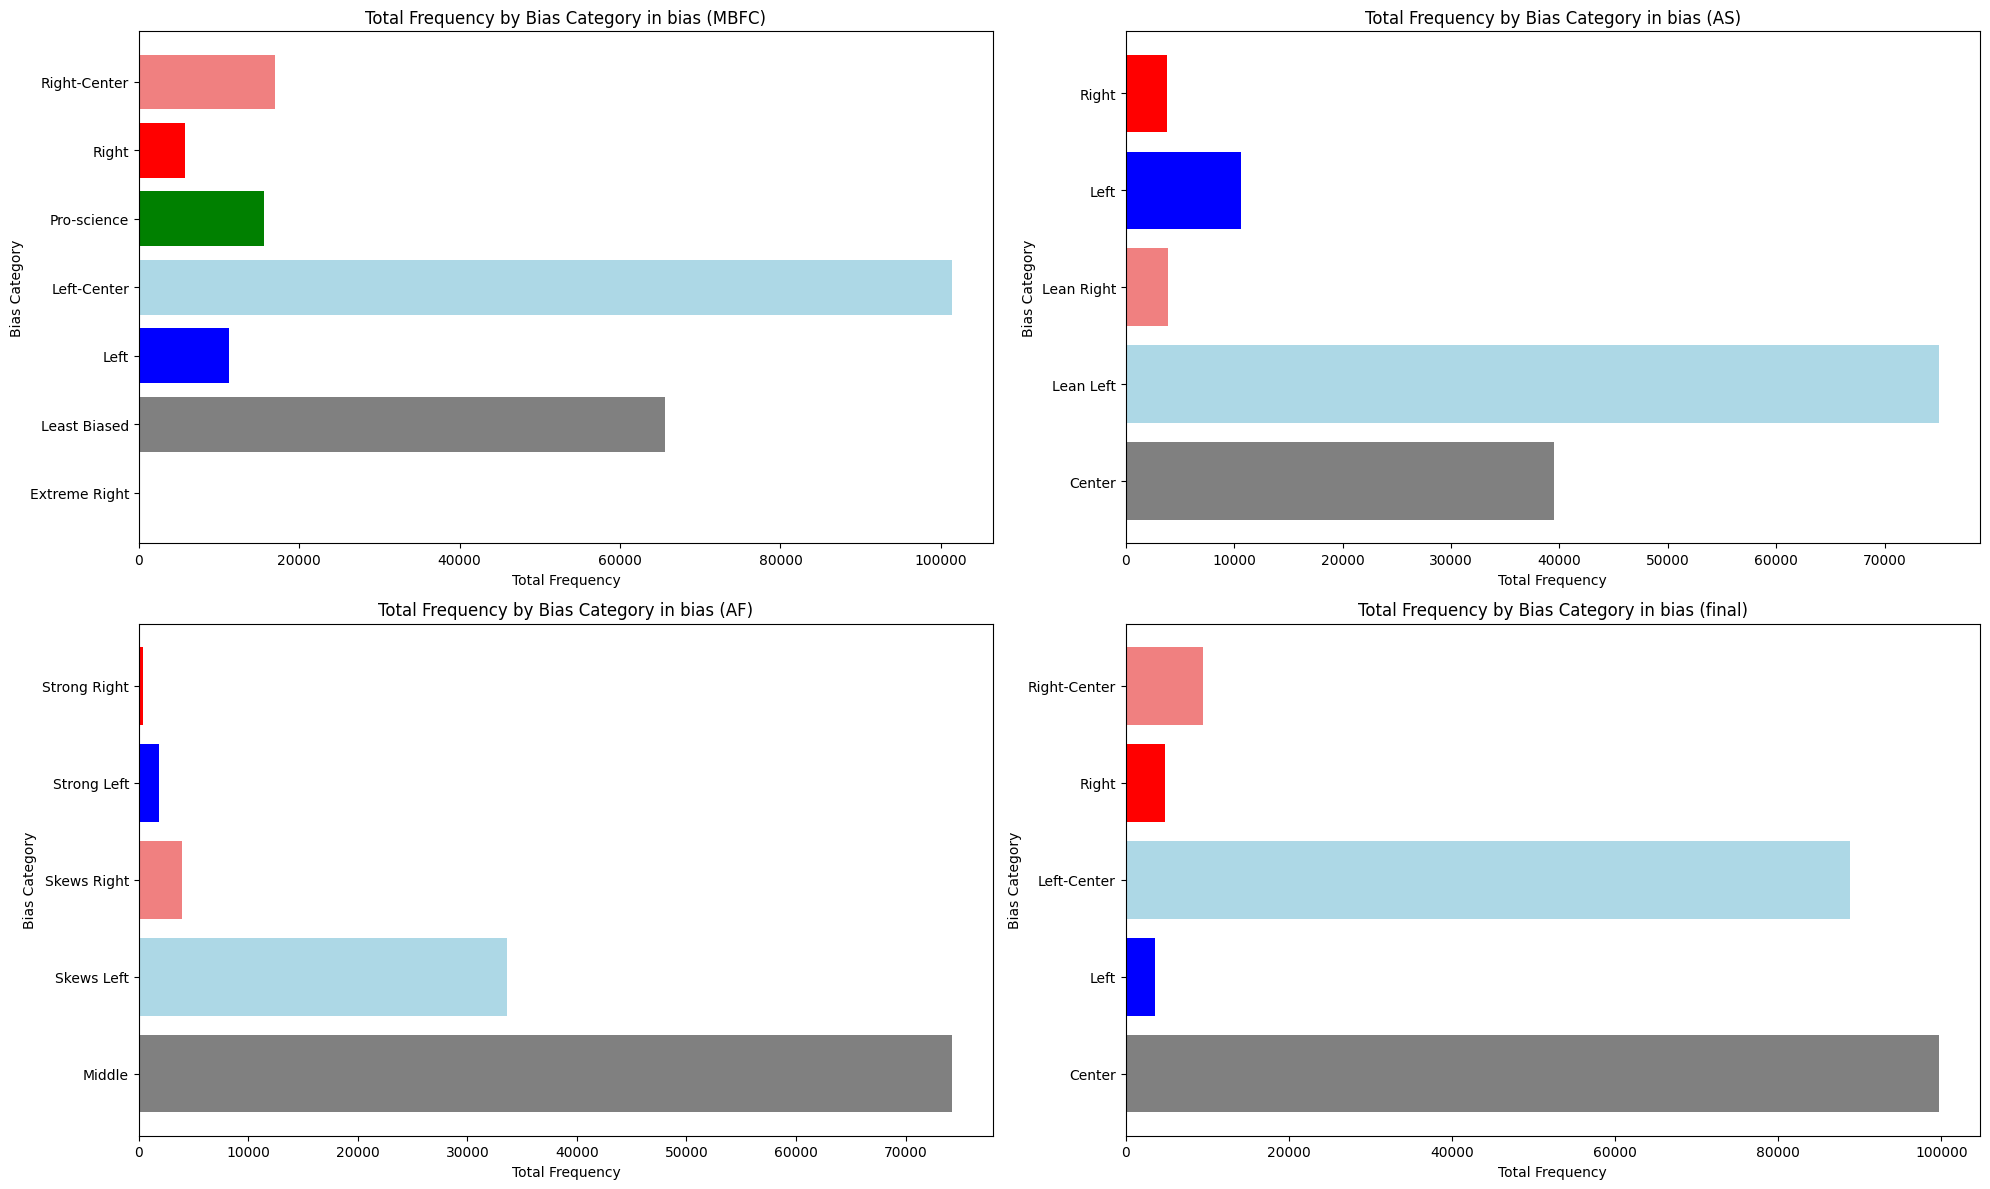

In [23]:
bias_colors = {
    "Extreme Right": "red", "Least Biased": "gray", "Left": "blue",
    "Left-Center": "lightblue", "Pro-science": "green", "Right": "red",
    "Right-Center": "lightcoral", "Center": "gray", "Lean Left": "lightblue",
    "Lean Right": "lightcoral", "Middle": "gray", "Skews Left": "lightblue",
    "Skews Right": "lightcoral", "Strong Left": "blue", "Strong Right": "red"
}

final_aggregated_df['color'] = final_aggregated_df['bias_category'].apply(lambda x: bias_colors.get(x, 'grey'))

plt.figure(figsize=(20, 12))

for i, bias_column in enumerate(bias_columns, start=1):
    plt.subplot(2, 2, i)
    data = final_aggregated_df[final_aggregated_df['bias_column'] == bias_column]
    bars = plt.barh(data['bias_category'], data['total_frequency'], color=[bias_colors.get(x, 'grey') for x in data['bias_category']])
    plt.title(f'Total Frequency by Bias Category in {bias_column}')
    plt.xlabel('Total Frequency')
    plt.ylabel('Bias Category')

plt.tight_layout()
plt.show()

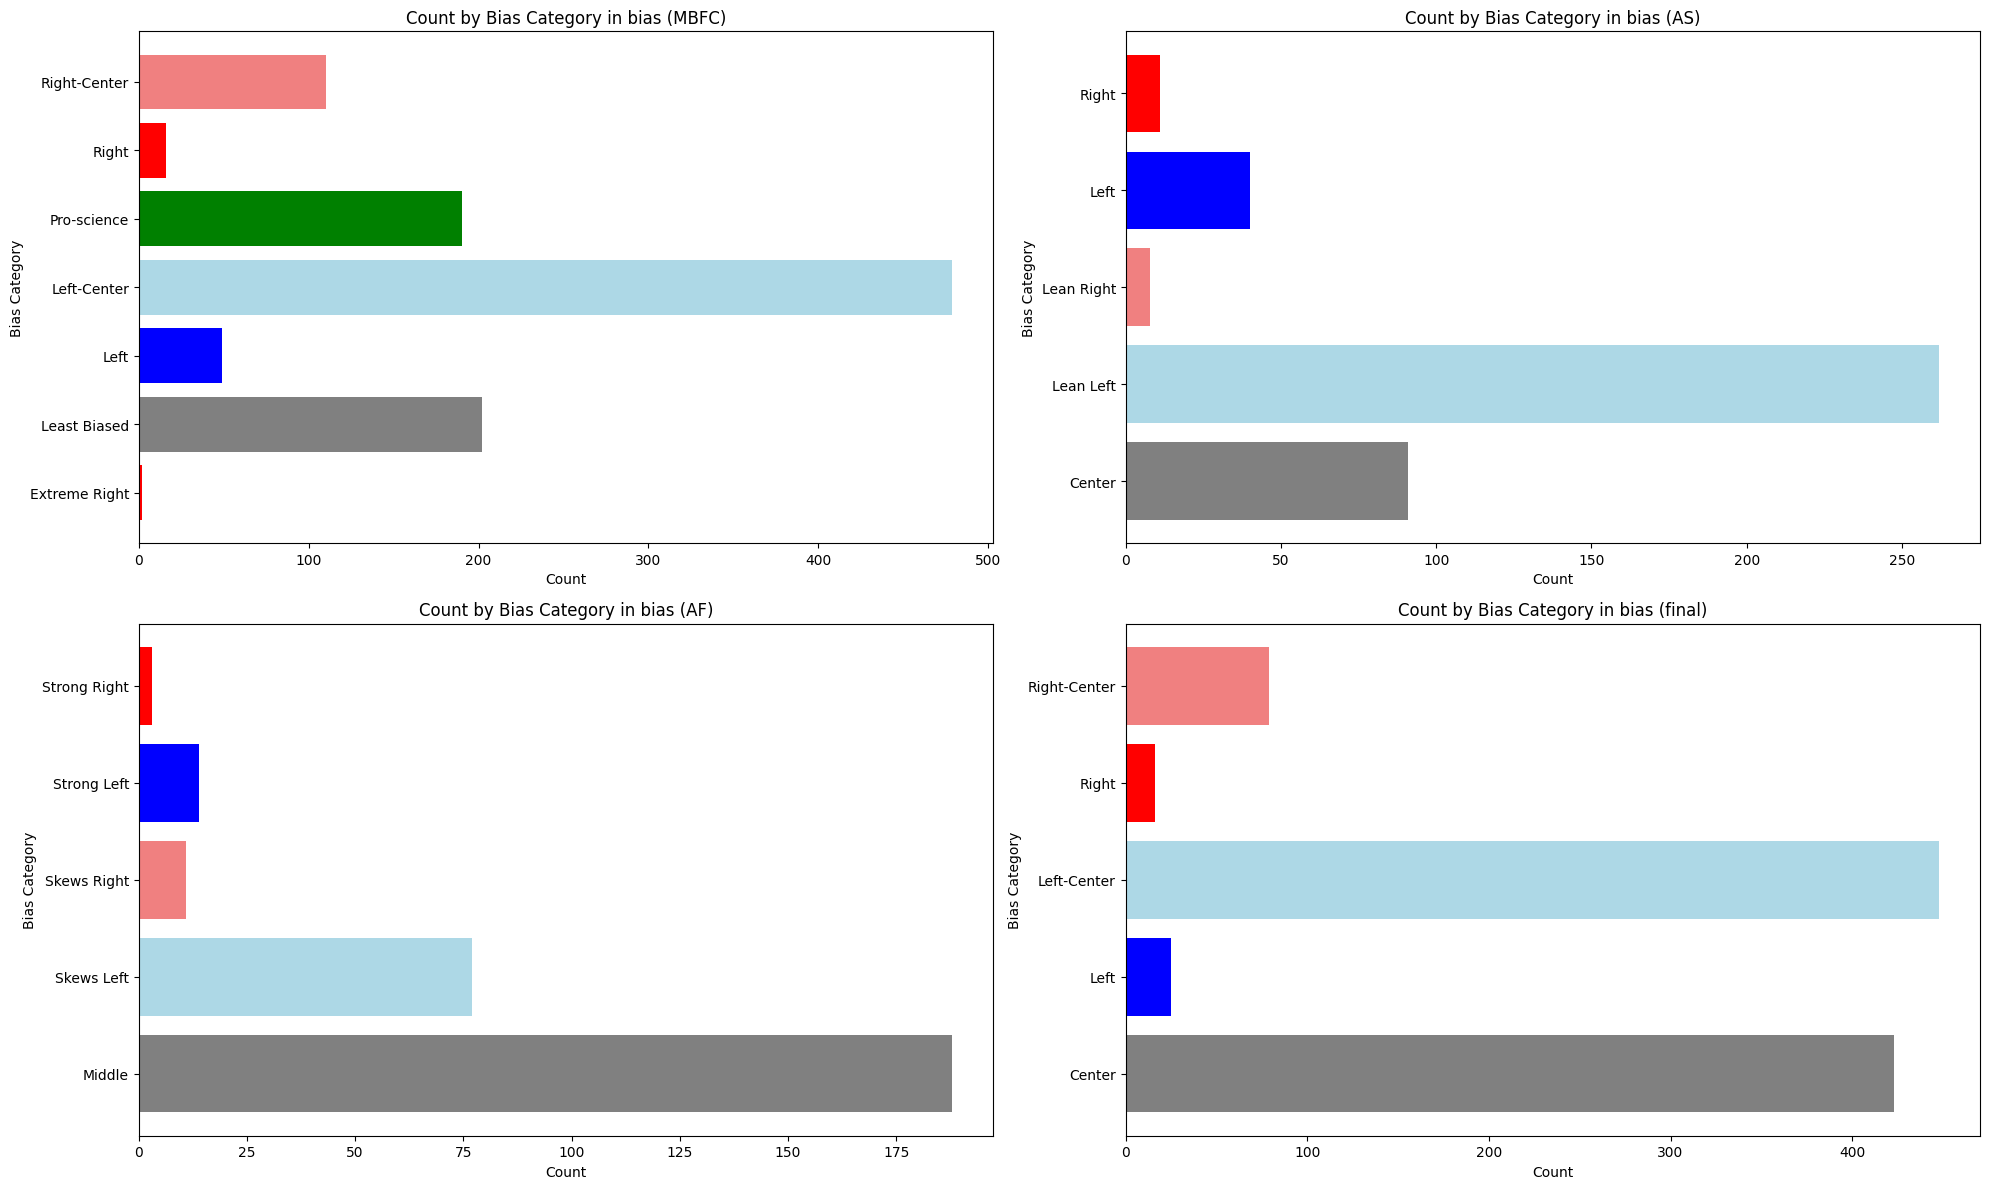

In [24]:
bias_colors = {
    "Extreme Right": "red", "Least Biased": "gray", "Left": "blue",
    "Left-Center": "lightblue", "Pro-science": "green", "Right": "red",
    "Right-Center": "lightcoral", "Center": "gray", "Lean Left": "lightblue",
    "Lean Right": "lightcoral", "Middle": "gray", "Skews Left": "lightblue",
    "Skews Right": "lightcoral", "Strong Left": "blue", "Strong Right": "red"
}

# Assign colors to each row in the DataFrame based on its bias category
final_aggregated_df['color'] = final_aggregated_df['bias_category'].apply(lambda x: bias_colors.get(x, 'grey'))

plt.figure(figsize=(20, 12))

for i, bias_column in enumerate(bias_columns, start=1):
    plt.subplot(2, 2, i)
    data = final_aggregated_df[final_aggregated_df['bias_column'] == bias_column]
    bars = plt.barh(data['bias_category'], data['count'], color=[bias_colors.get(x, 'grey') for x in data['bias_category']])
    plt.title(f'Count by Bias Category in {bias_column}')
    plt.xlabel('Count')
    plt.ylabel('Bias Category')

plt.tight_layout()
plt.show()

## Plotting type, bias and factuality class distributions by COUNTRY

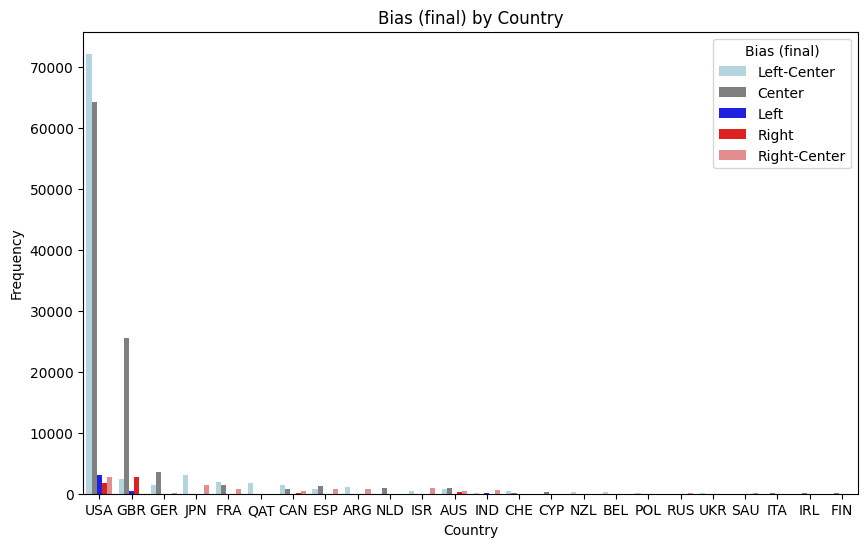

In [25]:
country_bias_grouped = sources.groupby(['country', 'bias (final)'])['frequency'].sum().reset_index()

color_map = {
    "Left": "blue",
    "Right": "red",
    "Center": "gray",
    "Left-Center": "lightblue",
    "Right-Center": "lightcoral"
}

country_bias_grouped.sort_values('frequency', ascending=False, inplace=True)

unique_hues = country_bias_grouped['bias (final)'].unique()
palette = {hue: color_map[hue] for hue in unique_hues if hue in color_map}

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='frequency', hue='bias (final)', data=country_bias_grouped, palette=palette)
plt.title('Bias (final) by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.legend(title='Bias (final)', loc='upper right')

plt.show()

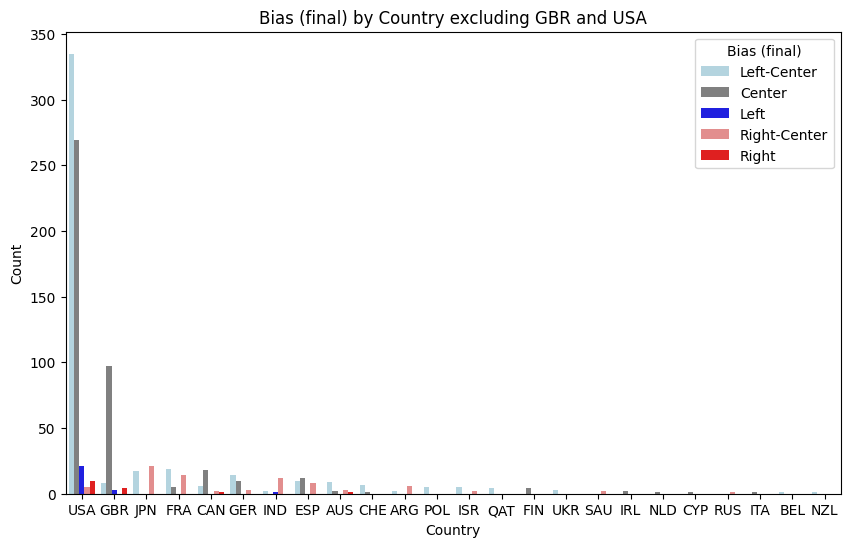

In [26]:
country_bias_grouped = sources.groupby(['country', 'bias (final)'])['url count'].sum().reset_index()

country_bias_grouped.sort_values('url count', ascending=False, inplace=True)

country_bias_grouped['bias (final)'].replace({"NaN": "Unknown"}, inplace=True)

color_map = {
    "Left": "blue",
    "Right": "red",
    "Center": "gray",
    "Left-Center": "lightblue",
    "Right-Center": "lightcoral"
}

unique_hues = country_bias_grouped['bias (final)'].unique()
palette = {hue: color_map[hue] for hue in unique_hues if hue in color_map}

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='url count', hue='bias (final)', data=country_bias_grouped, palette=palette)
plt.title('Bias (final) by Country excluding GBR and USA')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Bias (final)', loc='upper right')

plt.show()

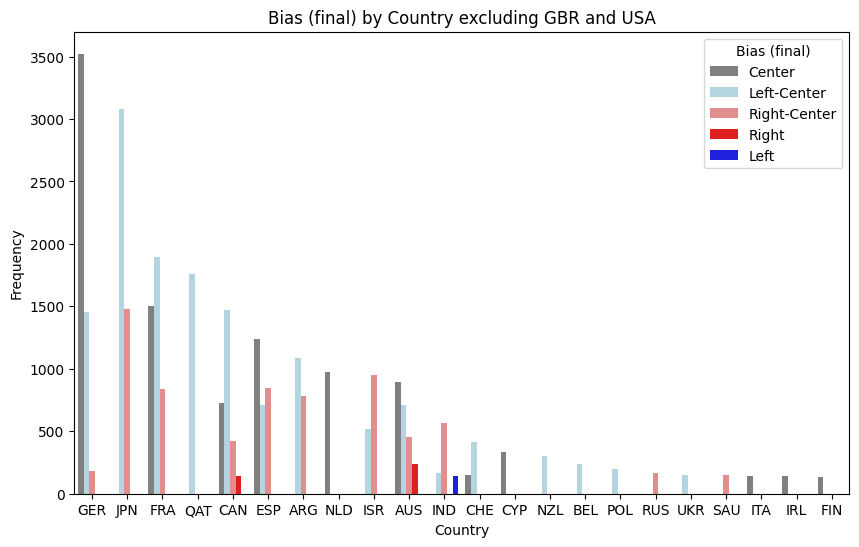

In [27]:
sources_without_usa_gbr = sources[(sources["country"] != "USA") & (sources["country"] != "GBR")]

country_bias_grouped = sources_without_usa_gbr.groupby(['country', 'bias (final)'])['frequency'].sum().reset_index()

country_bias_grouped['bias (final)'].replace({"NaN": "Unknown"}, inplace=True)

color_map = {
    "Left": "blue",
    "Right": "red",
    "Center": "gray",
    "Left-Center": "lightblue",
    "Right-Center": "lightcoral"
}

country_bias_grouped.sort_values('frequency', ascending=False, inplace=True)

unique_hues = country_bias_grouped['bias (final)'].unique()
palette = {hue: color_map[hue] for hue in unique_hues if hue in color_map}

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='frequency', hue='bias (final)', data=country_bias_grouped, palette=palette)
plt.title('Bias (final) by Country excluding GBR and USA')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.legend(title='Bias (final)', loc='upper right')

plt.show()

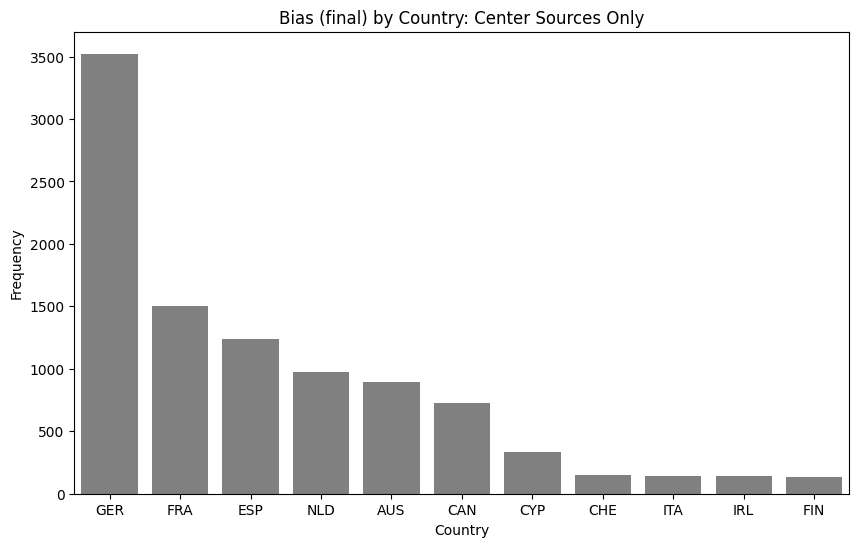

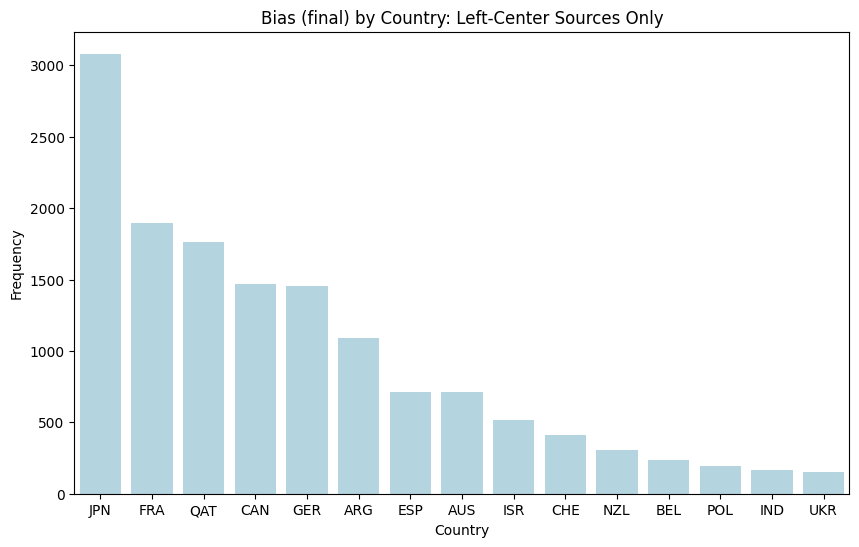

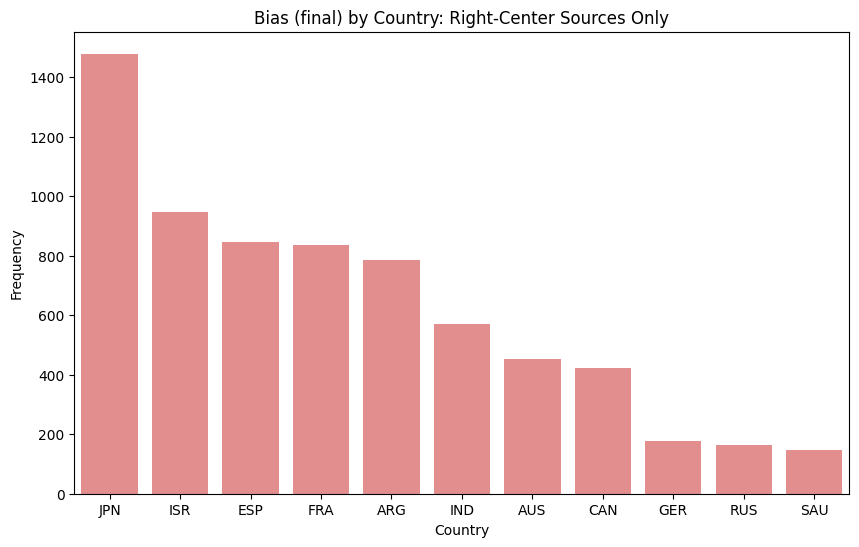

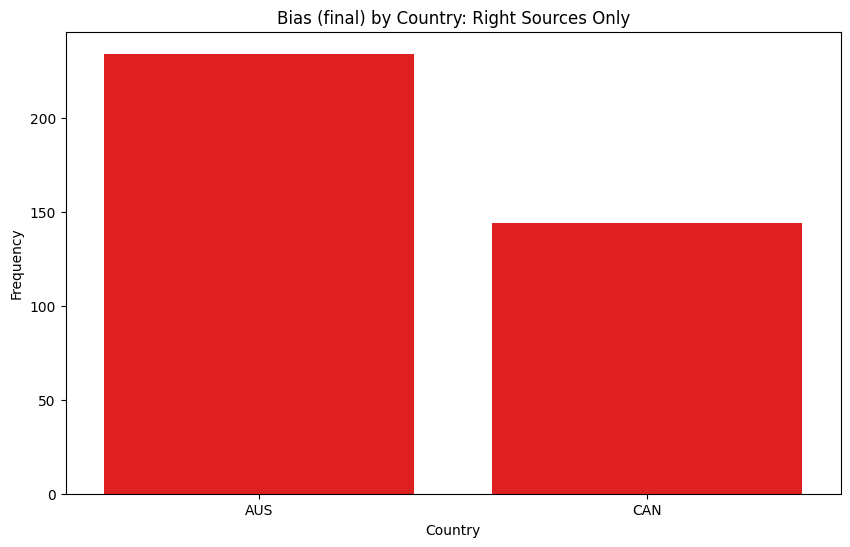

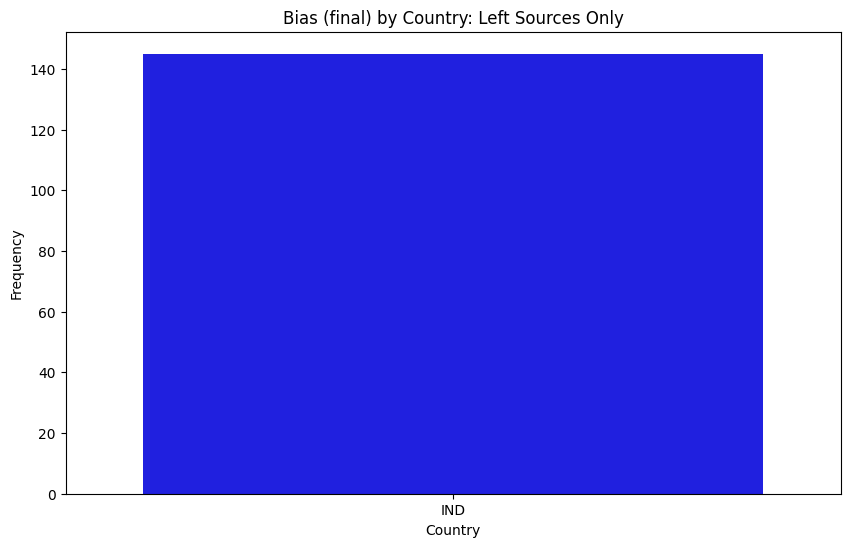

In [28]:


for hue in unique_hues:
    if hue in color_map:
        df_filtered = country_bias_grouped[country_bias_grouped['bias (final)'] == hue]

        plt.figure(figsize=(10, 6))
        sns.barplot(x='country', y='frequency', hue='bias (final)', data=df_filtered,
                    palette={hue: color_map[hue]})

        plt.title(f'Bias (final) by Country: {hue} Sources Only')
        plt.xlabel('Country')
        plt.ylabel('Frequency')

        plt.legend([],[], frameon=False)

        plt.show()

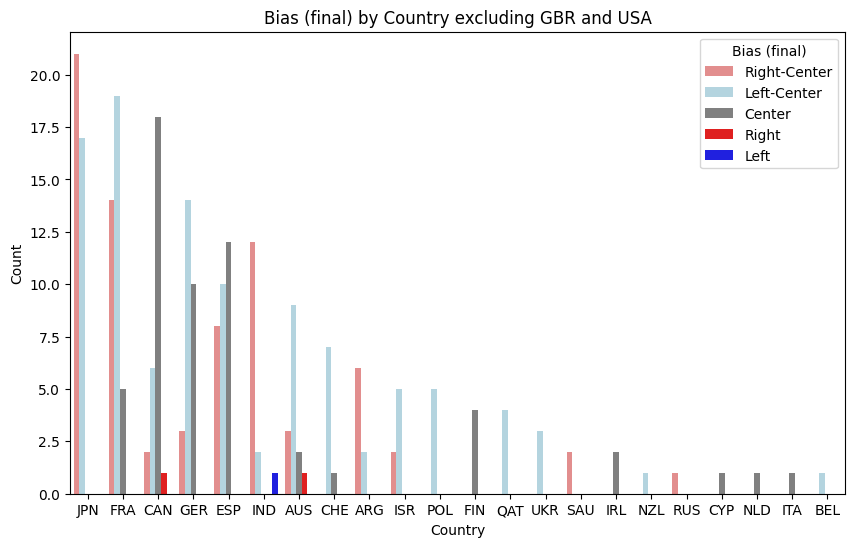

In [29]:
sources_without_usa_gbr = sources[(sources["country"] != "USA") & (sources["country"] != "GBR")]

country_bias_grouped = sources_without_usa_gbr.groupby(['country', 'bias (final)'])['url count'].sum().reset_index()

country_bias_grouped.sort_values('url count', ascending=False, inplace=True)

country_bias_grouped['bias (final)'].replace({"NaN": "Unknown"}, inplace=True)

color_map = {
    "Left": "blue",
    "Right": "red",
    "Center": "gray",
    "Left-Center": "lightblue",
    "Right-Center": "lightcoral"
}

unique_hues = country_bias_grouped['bias (final)'].unique()
palette = {hue: color_map[hue] for hue in unique_hues if hue in color_map}

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='url count', hue='bias (final)', data=country_bias_grouped, palette=palette)
plt.title('Bias (final) by Country excluding GBR and USA')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Bias (final)', loc='upper right')

plt.show()

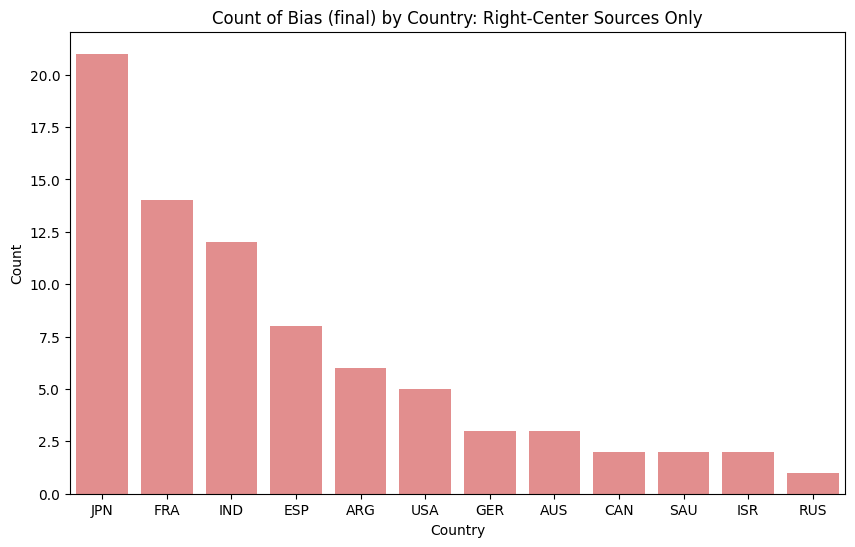

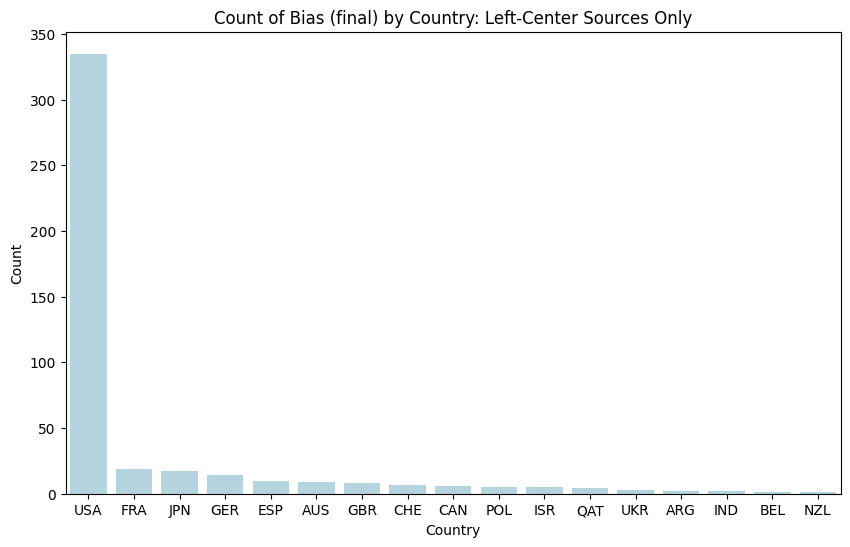

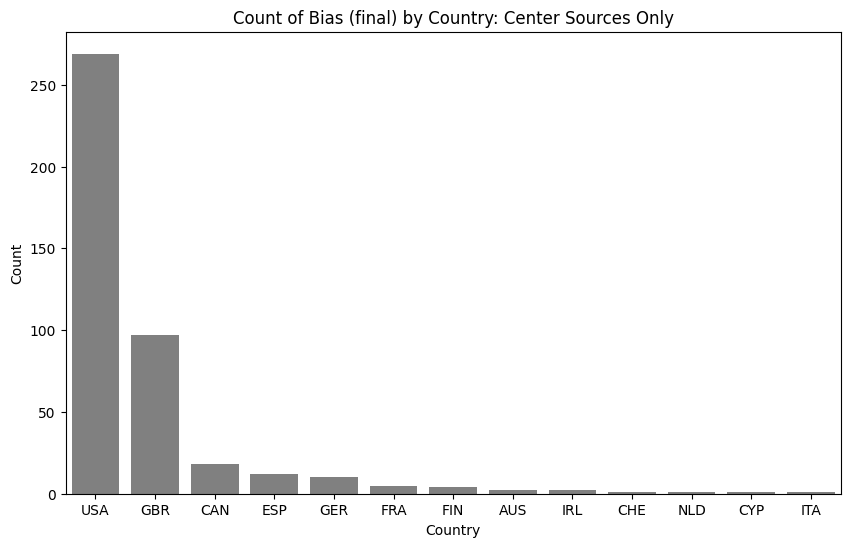

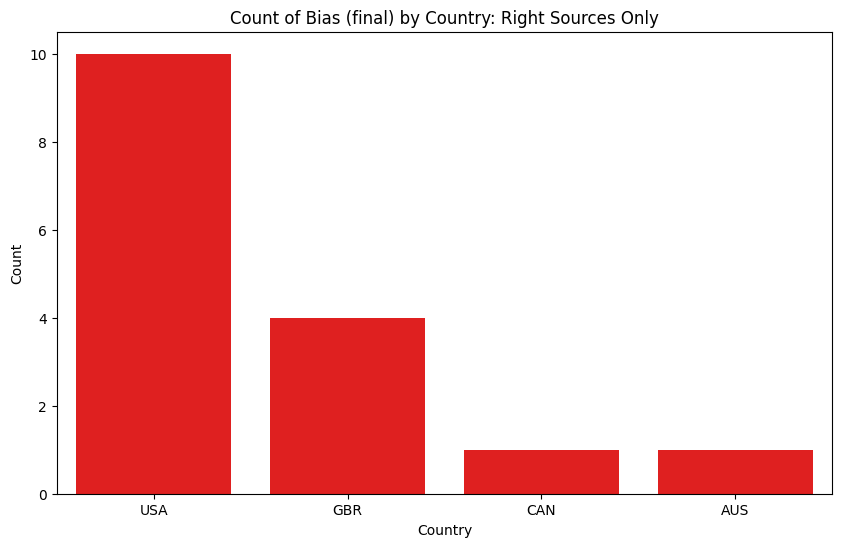

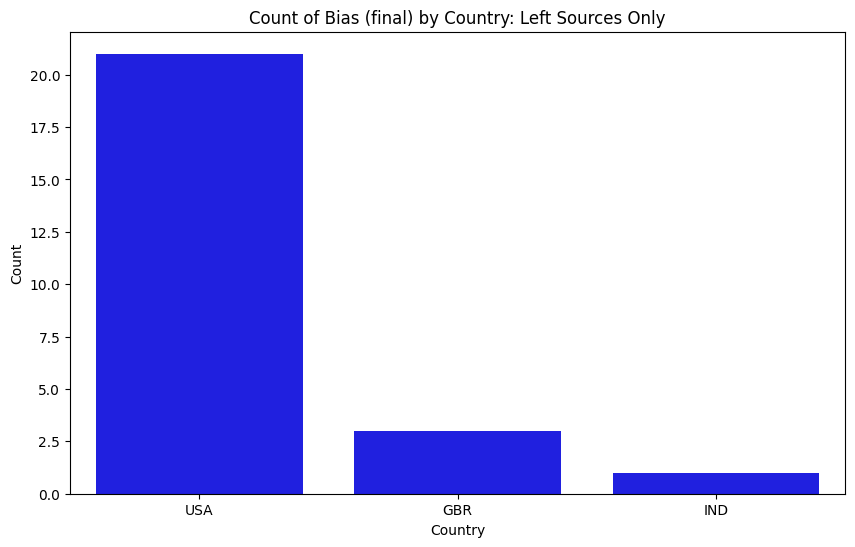

In [30]:
country_bias_count_grouped = sources.groupby(['country', 'bias (final)'])['url count'].sum().reset_index()

country_bias_count_grouped.sort_values('url count', ascending=False, inplace=True)

palette = {hue: color_map[hue] for hue in unique_hues if hue in color_map}

for hue in unique_hues:
    if hue in color_map:
        df_filtered = country_bias_count_grouped[country_bias_count_grouped['bias (final)'] == hue]

        plt.figure(figsize=(10, 6))

        sns.barplot(x='country', y='url count', hue='bias (final)', data=df_filtered,
                    palette={hue: color_map[hue]})

        plt.title(f'Count of Bias (final) by Country: {hue} Sources Only')
        plt.xlabel('Country')
        plt.ylabel('Count')

        plt.legend([],[], frameon=False)

        plt.show()

<ipython-input-31-1956d14452db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources_no_nan['relative_url_count'] = sources_no_nan.groupby('country')['url count'].transform(lambda x: x / x.sum() * 100)


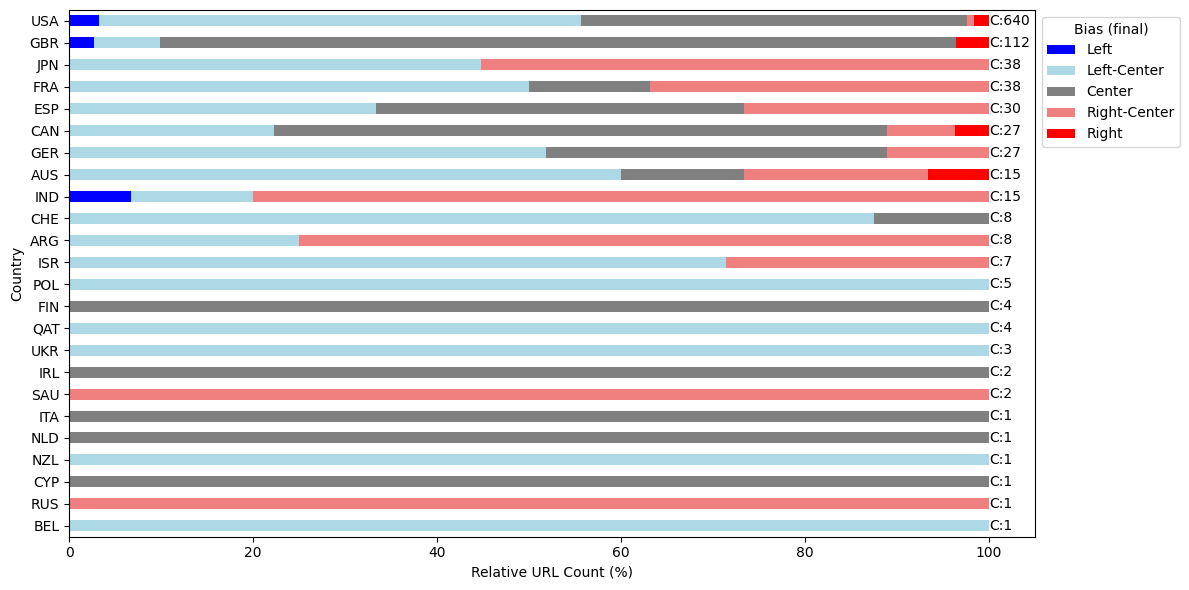

In [31]:
sources_no_nan = sources.dropna(subset=['bias (final)'])

total_counts = sources_no_nan.groupby('country')['url count'].sum()

sources_no_nan['relative_url_count'] = sources_no_nan.groupby('country')['url count'].transform(lambda x: x / x.sum() * 100)

grouped_relative_df = sources_no_nan.groupby(['country', 'bias (final)'])['relative_url_count'].sum().reset_index()

pivot_df = grouped_relative_df.pivot(index='country', columns='bias (final)', values='relative_url_count')

pivot_df = pivot_df[['Left', 'Left-Center', 'Center', 'Right-Center','Right']].fillna(0)
sorted_countries = total_counts.sort_values(ascending=True).index
pivot_df = pivot_df.reindex(sorted_countries)

color_map = {
    "Left": "blue",
    "Right": "red",
    "Center": "gray",
    "Left-Center": "lightblue",
    "Right-Center": "lightcoral"
}

unique_hues = country_bias_grouped['bias (final)'].unique()
palette = {hue: color_map[hue] for hue in unique_hues if hue in color_map}

ax = pivot_df.plot(kind='barh', stacked=True, figsize=(12, 6), color=[color_map.get(x) for x in pivot_df.columns if x in color_map])

plt.xlabel('Relative URL Count (%)')
plt.ylabel('Country')
plt.legend(title='Bias (final)', bbox_to_anchor=(1, 1), loc='upper left')

for i, country in enumerate(sorted_countries):
    plt.text(100, i, f'C:{total_counts[country]}', va='center')

plt.tight_layout()
plt.show()

In [32]:
sources["factuality (MBFC)"].value_counts()

factuality (MBFC)
High Factuality         116
Mostly Factual           37
Mixed Factuality         29
Very High Factuality     23
Low Factuality            1
Satire                    1
Name: count, dtype: int64

In [33]:
sources["reliability (AF)"].value_counts()

reliability (AF)
Reliable, Analysis/Fact Reporting              51
Generally Reliable/Analysis OR Other Issues    25
Mixed Reliability/Opinion OR Other Issues       4
Name: count, dtype: int64

<ipython-input-34-4bd7efd7a4a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources_no_nan['relative_url_count'] = sources_no_nan.groupby('country')['url count'].transform(lambda x: x / x.sum() * 100)


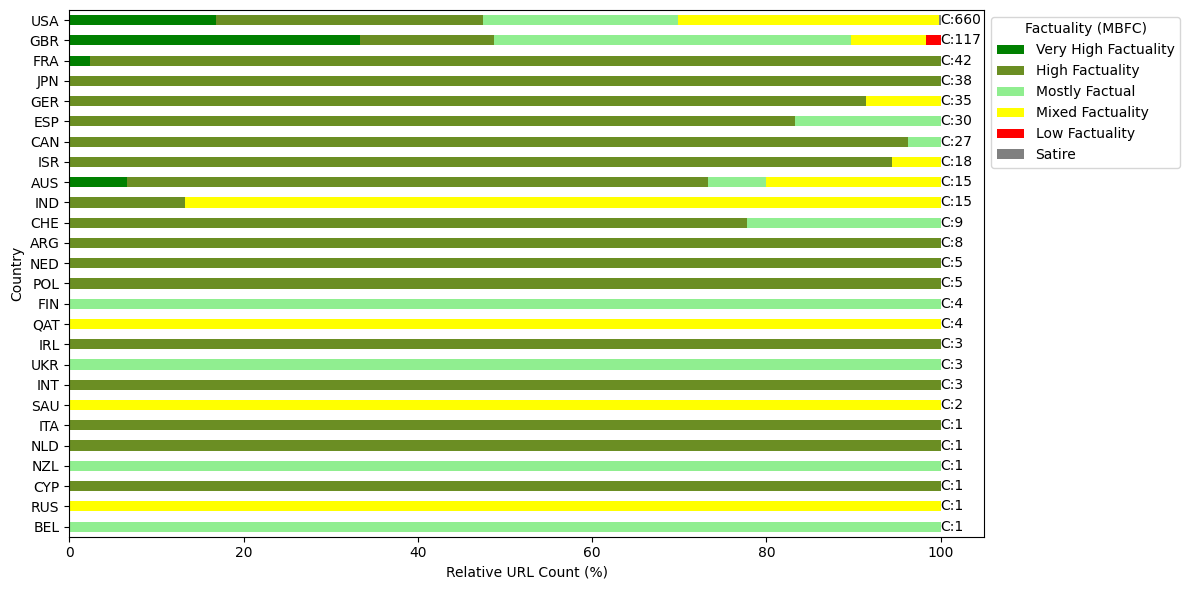

In [34]:
sources_no_nan = sources.dropna(subset=['factuality (MBFC)'])

total_counts = sources_no_nan.groupby('country')['url count'].sum()

sources_no_nan['relative_url_count'] = sources_no_nan.groupby('country')['url count'].transform(lambda x: x / x.sum() * 100)

grouped_relative_df = sources_no_nan.groupby(['country', 'factuality (MBFC)'])['relative_url_count'].sum().reset_index()

pivot_df = grouped_relative_df.pivot(index='country', columns='factuality (MBFC)', values='relative_url_count')

pivot_df = pivot_df[['Very High Factuality', 'High Factuality', 'Mostly Factual', 'Mixed Factuality', 'Low Factuality', 'Satire']].fillna(0)

sorted_countries = total_counts.sort_values(ascending=True).index
pivot_df = pivot_df.reindex(sorted_countries)

color_map_fact = {
    "Very High Factuality": "green",
    "High Factuality": "olivedrab",
    "Mostly Factual": "lightgreen",
    "Mixed Factuality": "yellow",
    "Low Factuality": "red",
    "Satire": "gray"
}

ax = pivot_df.plot(kind='barh', stacked=True, figsize=(12, 6), color=[color_map_fact.get(x) for x in pivot_df.columns if x in color_map_fact])

plt.xlabel('Relative URL Count (%)')
plt.ylabel('Country')
plt.legend(title='Factuality (MBFC)', bbox_to_anchor=(1, 1), loc='upper left')

for i, country in enumerate(sorted_countries):
    plt.text(100, i, f'C:{total_counts[country]}', va='center')

plt.tight_layout()
plt.show()

<ipython-input-35-b2a6ccd6492b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources_no_nan['relative_url_count'] = sources_no_nan.groupby('country')['url count'].transform(lambda x: x / x.sum() * 100)


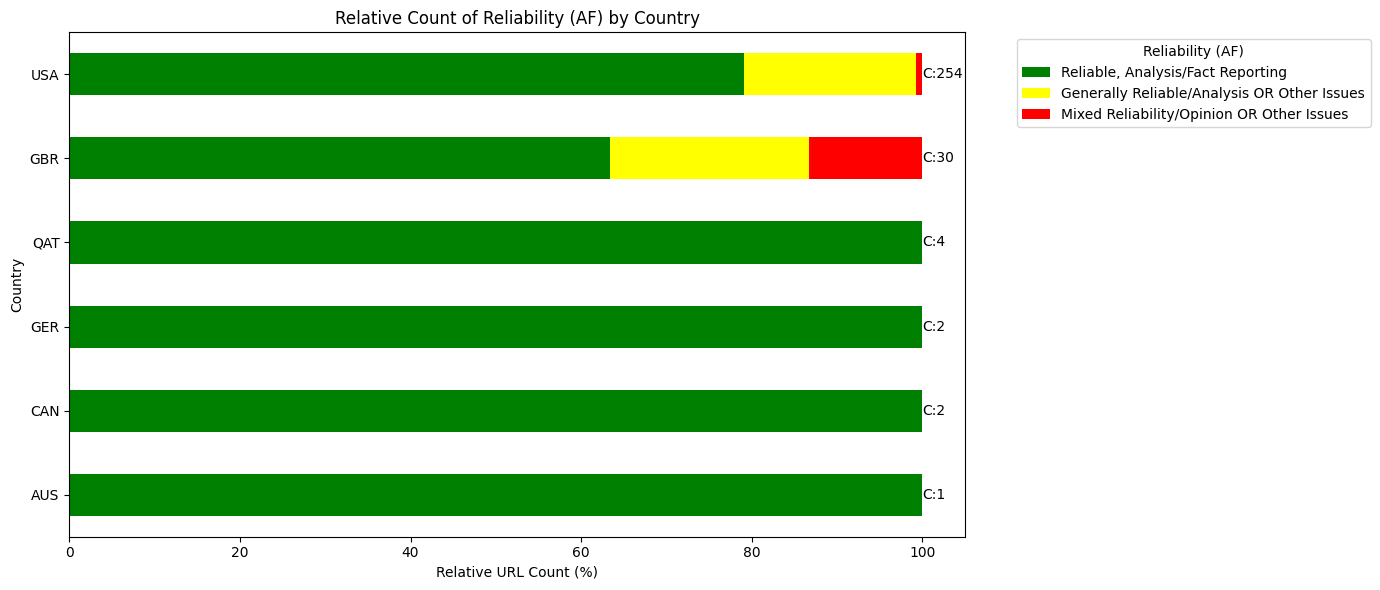

In [35]:
sources_no_nan = sources.dropna(subset=['reliability (AF)'])

total_counts = sources_no_nan.groupby('country')['url count'].sum()

sources_no_nan['relative_url_count'] = sources_no_nan.groupby('country')['url count'].transform(lambda x: x / x.sum() * 100)

grouped_relative_df = sources_no_nan.groupby(['country', 'reliability (AF)'])['relative_url_count'].sum().reset_index()

pivot_df = grouped_relative_df.pivot(index='country', columns='reliability (AF)', values='relative_url_count')

pivot_df = pivot_df[['Reliable, Analysis/Fact Reporting', 'Generally Reliable/Analysis OR Other Issues', 'Mixed Reliability/Opinion OR Other Issues']].fillna(0)
sorted_countries = total_counts.sort_values(ascending=True).index
pivot_df = pivot_df.reindex(sorted_countries)

color_map_rel = {
    "Reliable, Analysis/Fact Reporting": "green",
    "Generally Reliable/Analysis OR Other Issues": "yellow",
    "Mixed Reliability/Opinion OR Other Issues": "red",
}

unique_hues_rel = grouped_relative_df['reliability (AF)'].unique()
palette = {hue: color_map_rel[hue] for hue in unique_hues_rel if hue in color_map_rel}

ax = pivot_df.plot(kind='barh', stacked=True, figsize=(14, 6), color=[color_map_rel.get(x) for x in pivot_df.columns if x in color_map_rel])

plt.title('Relative Count of Reliability (AF) by Country')
plt.xlabel('Relative URL Count (%)')
plt.ylabel('Country')
plt.legend(title='Reliability (AF)', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, country in enumerate(sorted_countries):
    plt.text(100, i, f'C:{total_counts[country]}', va='center')

plt.tight_layout()
plt.show()

In [36]:
import matplotlib.colors as mcolors

def assign_category_color(category):
    if category == 'News':
        return mcolors.to_rgba((0.2, 0.2, 0.8), alpha=0.8)  # Light blue in RGBA format
    elif category == 'Fact-checking':
        return mcolors.to_rgba((0.6, 0.6, 0.6), alpha=0.8)  # Light gray in RGBA format
    elif category == 'Dictionary/Encyclopedia':
        return mcolors.to_rgba((0.8, 0.2, 0.2), alpha=0.8)  # Light red in RGBA format
    elif category == 'Government/Civil':
        return mcolors.to_rgba((0.2, 0.8, 0.2), alpha=0.8)  # Light green in RGBA format
    elif category == 'Social Media/Platforms':
        return mcolors.to_rgba((0.8, 0.8, 0.2), alpha=0.8)  # Light yellow in RGBA format
    elif category == 'Research':
        return mcolors.to_rgba((0.9, 0.5, 0.1), alpha=0.8)  # Orange in RGBA format
    elif category == 'Search Engine':
        return mcolors.to_rgba((0.7, 0.5, 0.5), alpha=0.8)  # Orange in RGBA format
    elif category == 'Web Archive':
        return mcolors.to_rgba((0.8, 0, 0.8), alpha=0.8) # Black in RGBA format
    elif category == 'Other':
        return mcolors.to_rgba((0, 0, 0), alpha=0.8) # Black in RGBA format
    return mcolors.to_rgba((1, 1, 1), alpha=1)  # Default color: White in RGBA format

unique_types = sources['type'].unique()
color_map = {category: assign_category_color(category) for category in unique_types}

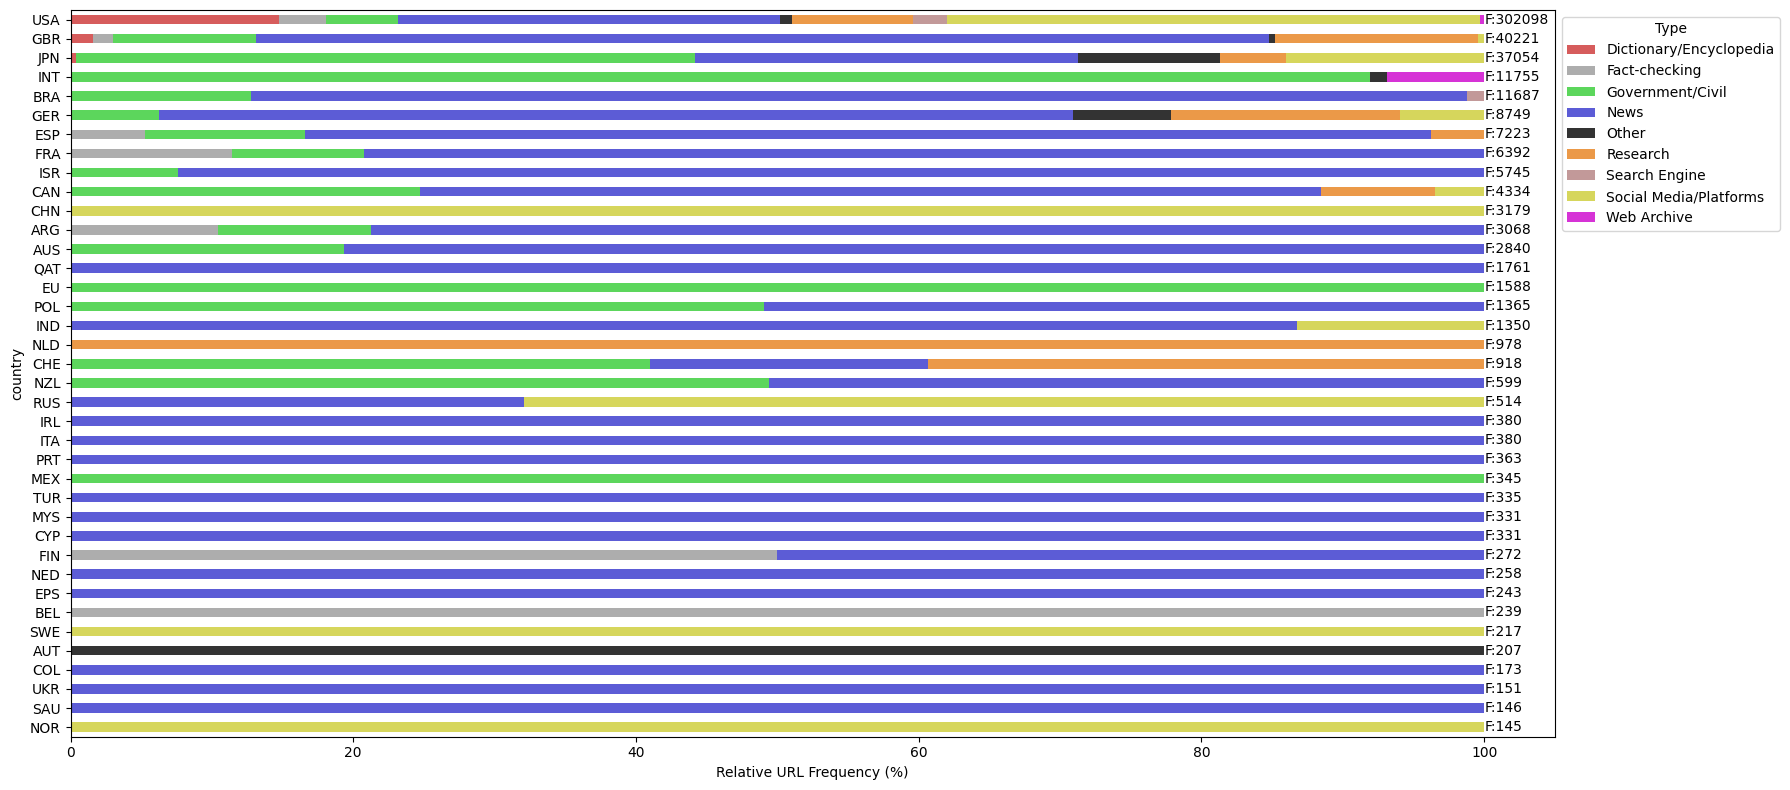

In [37]:
total_freq = sources.groupby('country')['frequency'].sum()

sources['relative_freq_count'] = sources.groupby('country')['frequency'].transform(lambda x: x / x.sum() * 100)

grouped_relative_df = sources.groupby(['country', 'type'])['relative_freq_count'].sum().unstack().fillna(0)

sorted_countries = total_freq.sort_values(ascending=True).index.tolist()
grouped_relative_df = grouped_relative_df.reindex(sorted_countries)

grouped_relative_df.plot(kind='barh', stacked=True, figsize=(18, 8),
                          color=[color_map.get(x) for x in grouped_relative_df.columns])

plt.xlabel('Relative URL Frequency (%)')
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')

for i, value in enumerate(sorted_countries):
    total = total_freq[value]
    plt.text(100, i, f'F:{total}', va='center')

plt.tight_layout()
plt.show()

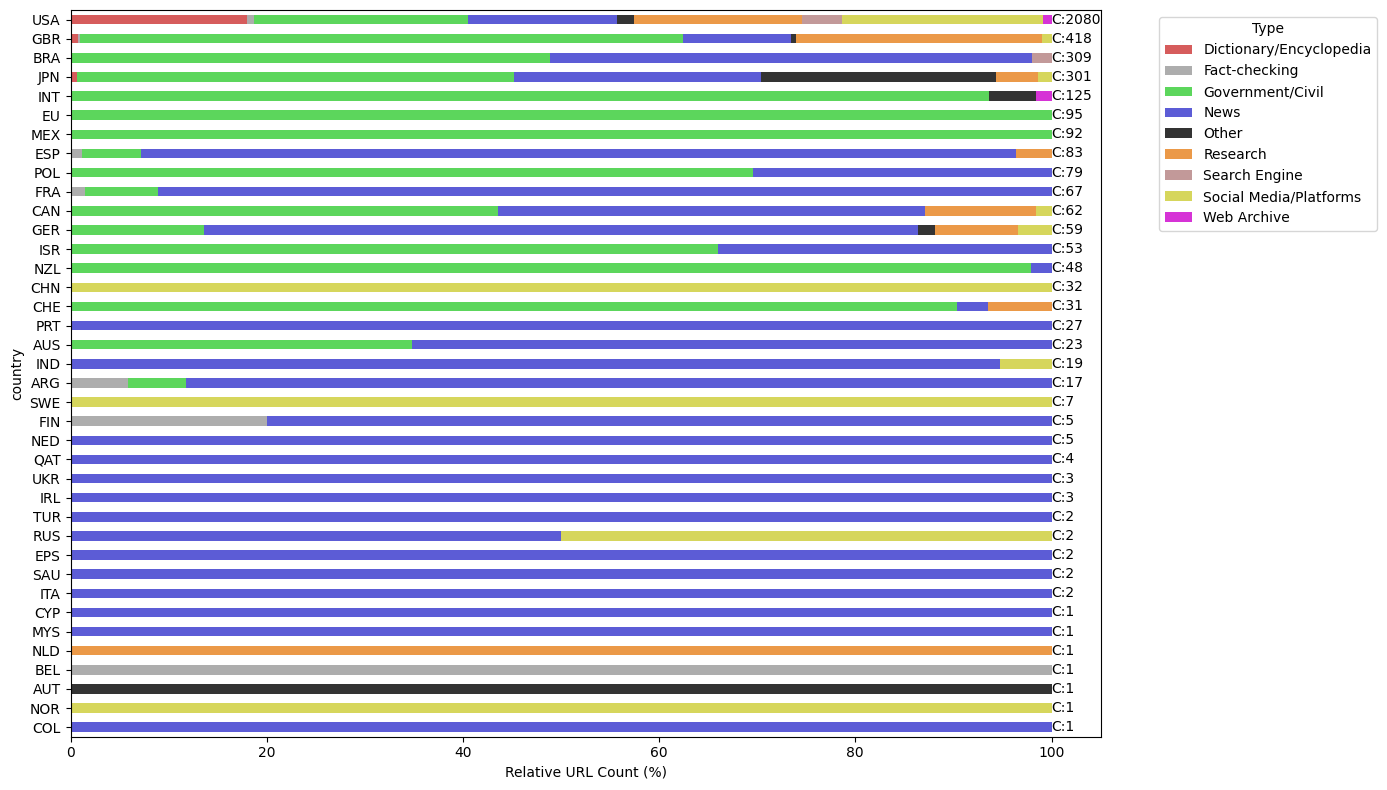

In [38]:
total_counts = sources.groupby('country')['url count'].sum()

sources['relative_url_count'] = sources.groupby('country')['url count'].transform(lambda x: x / x.sum() * 100)

grouped_relative_df = sources.groupby(['country', 'type'])['relative_url_count'].sum().unstack().fillna(0)

sorted_countries = total_counts.sort_values(ascending=True).index
grouped_relative_df = grouped_relative_df.reindex(sorted_countries)

grouped_relative_df.plot(kind='barh', stacked=True, figsize=(14, 8), color=[color_map.get(x) for x in grouped_relative_df.columns])

plt.xlabel('Relative URL Count (%)')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, country in enumerate(sorted_countries):
    plt.text(100, i, f'C:{total_counts[country]}', va='center')

plt.tight_layout()
plt.show()

## Plotting top 50 sources

In [39]:
sources.head()

,url,frequency,merged_urls,country,type,bias (MBFC),bias (AS),bias (AF),bias (final),factuality (MBFC),reliability (AF),url count,relative_freq_count,relative_url_count
0,twitter.com,60168,"[pic.twitter.com, ads.twitter.com, blog.twitte...",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN,21,19.916716,1.009615
1,wikipedia.org,39750,"[m.wikipedia.org, th.m.wikipedia.org, lt.wikip...",USA,Dictionary/Encyclopedia,Least Biased,NaN,NaN,Center,Mixed Factuality,NaN,83,13.157982,3.990385
2,x.com,23052,"[ads.x.com, help.x.com, business.x.com, commun...",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN,5,7.630636,0.240385
3,youtube.com,18370,"[m.youtube.com, tv.youtube.com, music.youtube....",USA,Social Media/Platforms,NaN,NaN,NaN,NaN,NaN,NaN,7,6.080808,0.336538
4,bbc.co.uk,10522,"[bbc.com, news.bbc.co.uk, genome.ch.bbc.co.uk,...",GBR,News,Left-Center,Center,Middle,Center,High Factuality,"Reliable, Analysis/Fact Reporting",5,26.160463,1.196172


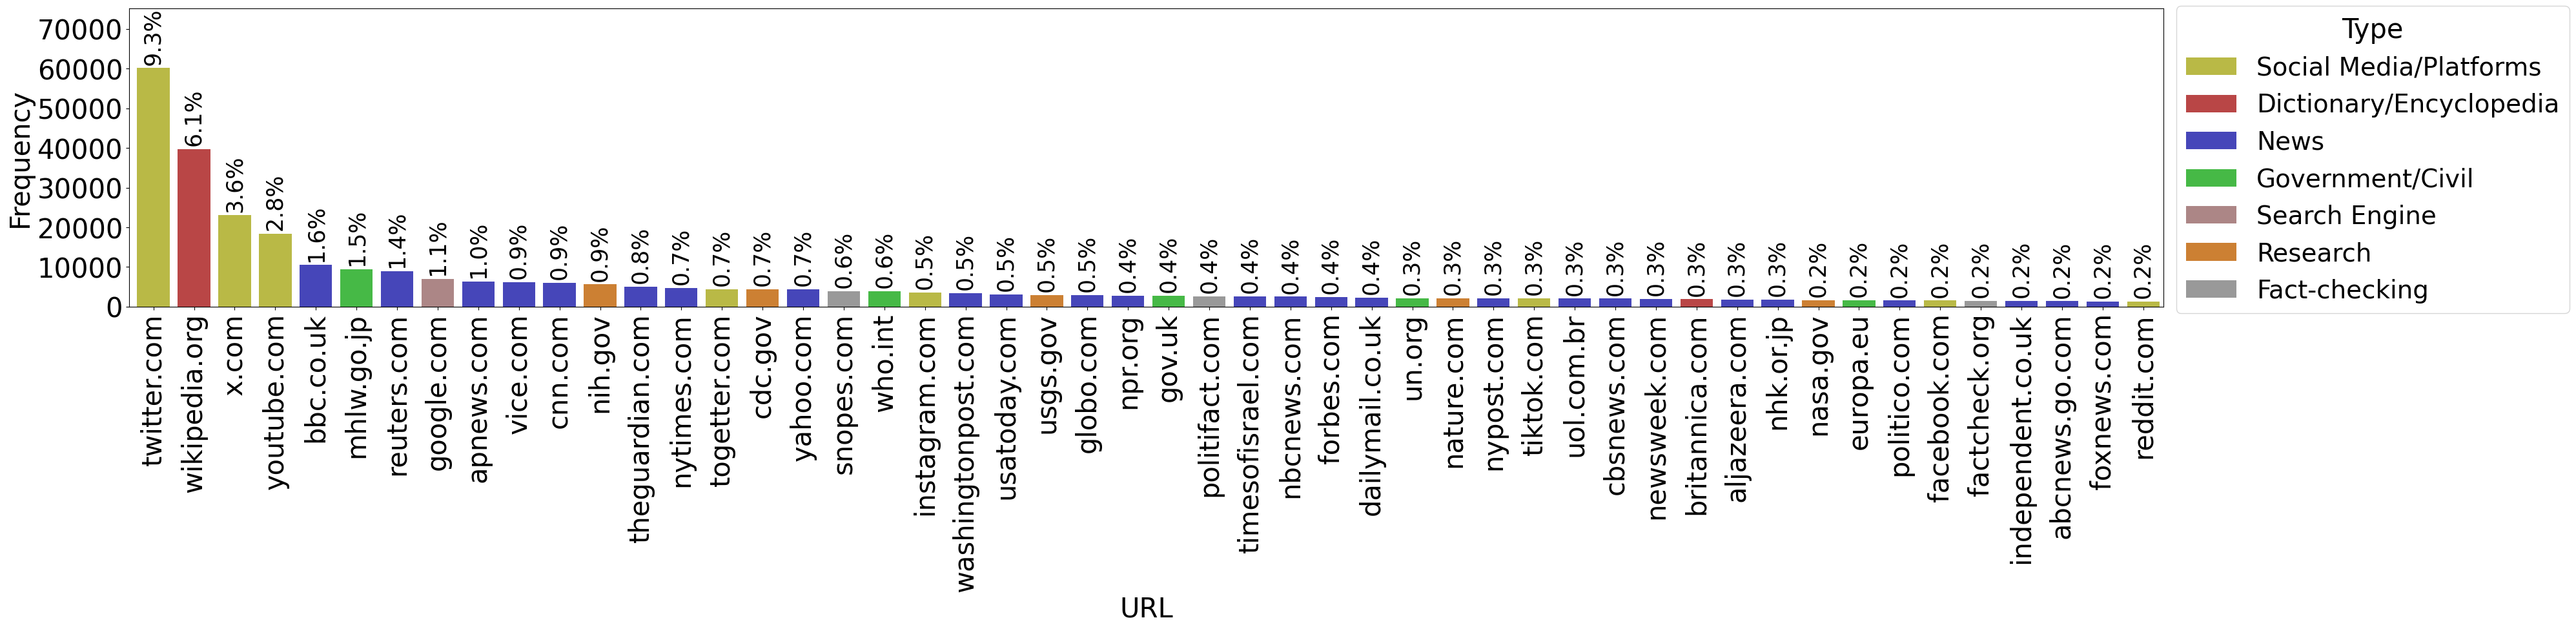

In [40]:
unique_types = sources['type'].unique()
palette = {type_: assign_category_color(type_) for type_ in unique_types}

plt.figure(figsize=(40, 10))
ax = sns.barplot(x='url', y='frequency', data=sources[:50], hue='type', dodge=False, palette=palette)
xlims = ax.get_xlim()
ax.set_xlim(left=xlims[0]-0.1)
ylims = ax.get_ylim()
ax.set_ylim(top=ylims[1] + 12000)

plt.xlabel('URL', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
legend = plt.legend(title='Type', bbox_to_anchor=(1, 1.05), loc='upper left', fontsize=28)
legend.get_title().set_fontsize('30')
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)

total = float(sources['frequency'].sum())
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height/total:.1f}%'
    if percentage == '0.0%':
      continue
    ax.text(p.get_x() + p.get_width() / 2., height + 2000, f'{percentage}', rotation=90, ha="center", fontsize=25)

plt.tight_layout()
plt.show()

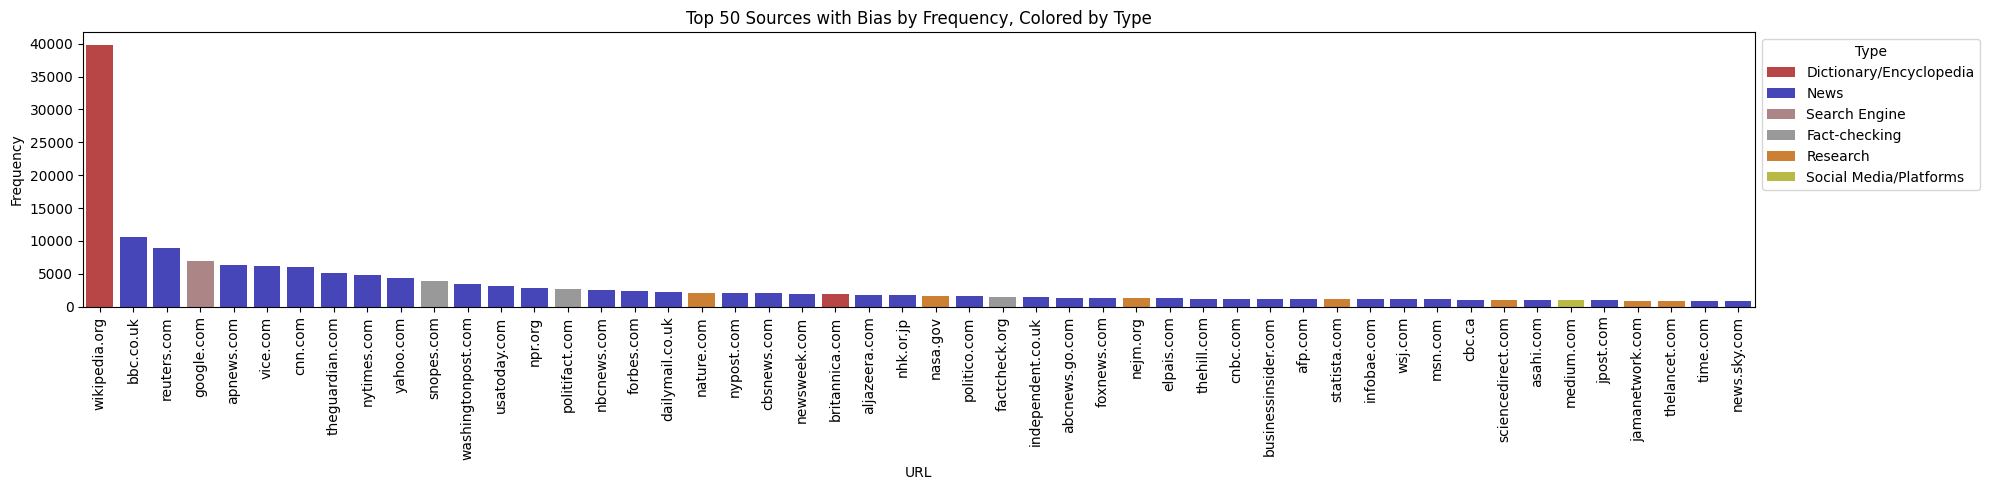

In [41]:
sources_with_bias = sources.dropna(subset=['bias (final)'])

unique_types = sources_with_bias['type'].unique()
palette = {type_: assign_category_color(type_) for type_ in unique_types}

plt.figure(figsize=(20, 5))
sns.barplot(x='url', y='frequency', data=sources_with_bias[:50], hue='type', dodge=False, palette=palette)

plt.title('Top 50 Sources with Bias by Frequency, Colored by Type')
plt.xlabel('URL')
plt.ylabel('Frequency')
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

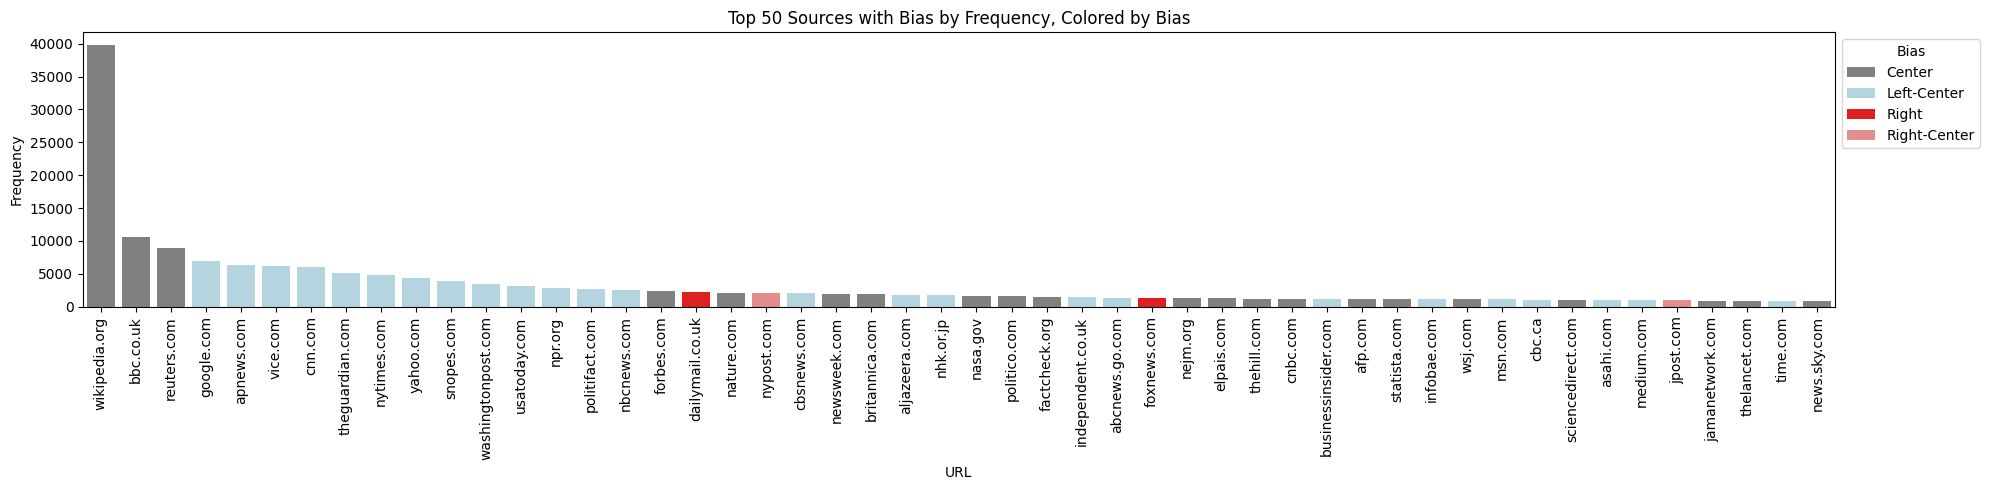

In [42]:
import numpy as np

color_map = {
    "Left": "blue",
    "Right": "red",
    "Center": "gray",
    "Left-Center": "lightblue",
    "Right-Center": "lightcoral",
    "Other": "green"
}

bias_categories = ['Left', 'Right', 'Center', 'Left-Center', 'Right-Center', 'Other']

sources_with_bias = sources.dropna(subset=['bias (final)'])
sources_with_bias = sources_with_bias.sort_values(by='frequency', ascending=False).head(50)

unique_biases = sources_with_bias['bias (final)'].unique()
palette = {bias: color_map.get(bias, "black") for bias in unique_biases}

plt.figure(figsize=(20, 5))
sns.barplot(x='url', y='frequency', data=sources_with_bias, hue='bias (final)', dodge=False, palette=palette)

plt.title('Top 50 Sources with Bias by Frequency, Colored by Bias')
plt.xlabel('URL')
plt.ylabel('Frequency')
plt.legend(title='Bias', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

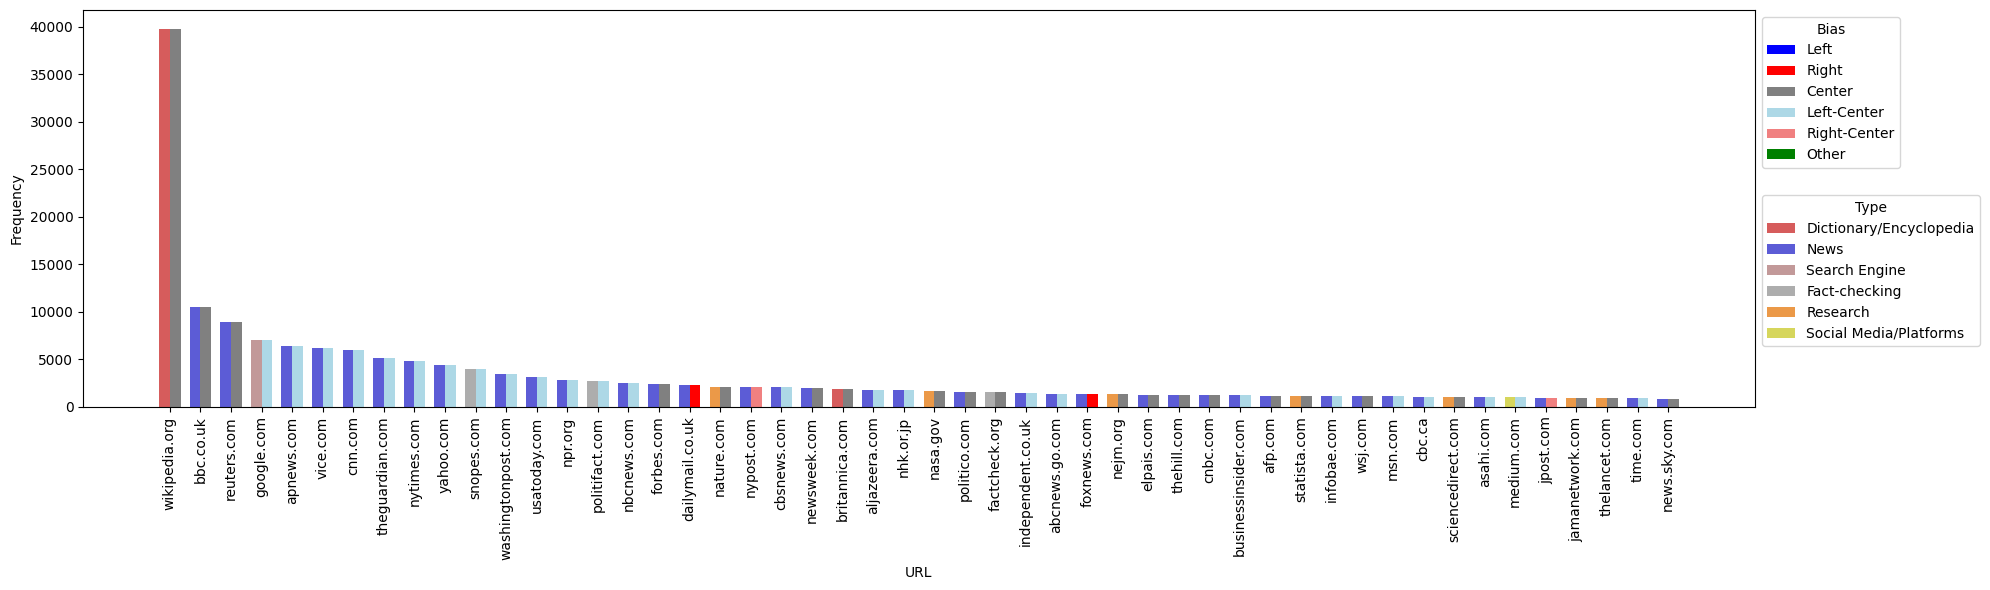

In [43]:
sources_with_bias = sources.dropna(subset=['bias (final)'])
sources_with_bias = sources_with_bias.sort_values(by='frequency', ascending=False).head(50)

sources_with_bias['bias_color'] = sources_with_bias['bias (final)'].map(color_map)
sources_with_bias['type_color'] = sources_with_bias['type'].apply(assign_category_color)

types_df = sources_with_bias[['url', 'frequency', 'type', 'type_color']].copy()
biases_df = sources_with_bias[['url', 'frequency', 'bias (final)', 'bias_color']].copy()

bar_width = 0.35
index = np.arange(len(sources_with_bias))

fig, ax = plt.subplots(figsize=(20, 6))

type_bars = ax.bar(index - bar_width/2, types_df['frequency'], bar_width, label='Type', color=types_df['type_color'])

bias_bars = ax.bar(index + bar_width/2, biases_df['frequency'], bar_width, label='Bias', color=biases_df['bias_color'])

ax.set_xlabel('URL')
ax.set_ylabel('Frequency')
ax.set_xticks(index)
ax.set_xticklabels(sources_with_bias['url'], rotation=90)


from matplotlib.patches import Patch

bias_legend_elements = [Patch(facecolor=color_map[bias], label=bias) for bias in color_map]
bias_legend = ax.legend(handles=bias_legend_elements, title='Bias', loc='upper left', bbox_to_anchor=(1, 1))

plt.gca().add_artist(bias_legend)

type_legend_elements = [Patch(facecolor=assign_category_color(category), label=category) for category in types_df['type'].unique()]
type_legend = ax.legend(handles=type_legend_elements, title='Type', loc='upper left', bbox_to_anchor=(1, 0.55))

plt.tight_layout()
plt.show()

## Plotting Sankey graph

In [44]:
sources_with_bias = sources.dropna(subset=['type', 'bias (final)', 'factuality (MBFC)'])
sources_with_bias.head()

,url,frequency,merged_urls,country,type,bias (MBFC),bias (AS),bias (AF),bias (final),factuality (MBFC),reliability (AF),url count,relative_freq_count,relative_url_count
1,wikipedia.org,39750,"[m.wikipedia.org, th.m.wikipedia.org, lt.wikip...",USA,Dictionary/Encyclopedia,Least Biased,NaN,NaN,Center,Mixed Factuality,NaN,83,13.157982,3.990385
4,bbc.co.uk,10522,"[bbc.com, news.bbc.co.uk, genome.ch.bbc.co.uk,...",GBR,News,Left-Center,Center,Middle,Center,High Factuality,"Reliable, Analysis/Fact Reporting",5,26.160463,1.196172
6,reuters.com,8938,"[jp.reuters.com, plus.reuters.com, blogs.reute...",GBR,News,Least Biased,Center,Middle,Center,Very High Factuality,"Reliable, Analysis/Fact Reporting",7,22.222222,1.674641
7,google.com,7004,"[google.co.ve, google.co.uk, google.co.jp, goo...",USA,Search Engine,Left-Center,Lean Left,NaN,Left-Center,Mostly Factual,NaN,67,2.318453,3.221154
8,apnews.com,6381,[projects.apnews.com],USA,News,Left-Center,Lean Left,Middle,Left-Center,High Factuality,"Reliable, Analysis/Fact Reporting",2,2.112228,0.096154


In [45]:
gov_df = sources_with_bias[sources_with_bias["type"] == "Government/Civil"]
freq_of_gov = gov_df['frequency'].sum()
freq_of_gov

1302

In [46]:
import plotly.graph_objects as go
import numpy as np

def assign_category_color(category):
    if category == 'News':
        return "rgba(0.2, 0.2, 0.8, 0.8)"  # Light blue in RGBA format
    elif category == 'Fact-checking':
        return "rgba(0.6, 0.6, 0.6, 0.8)"  # Light gray in RGBA format
    elif category == 'Dictionary/Encyclopedia':
        return "rgba(0.8, 0.2, 0.2, 0.8)"  # Light red in RGBA format
    elif category == 'Government/Civil':
        return "rgba(0.2, 0.8, 0.2, 0.8)"  # Light green in RGBA format
    elif category == 'Social Media/Platforms':
        return "rgba(0.8, 0.8, 0.2, 0.8)"  # Light yellow in RGBA format
    elif category == 'Research':
        return "rgba(0.9, 0.5, 0.1, 0.8)"  # Orange in RGBA format
    elif category == 'Search Engine':
        return "rgba(0.7, 0.5, 0.5, 0.8)"  # Brownish-orange in RGBA format
    elif category == 'Web Archive':
        return "rgba(0.8, 0, 0.8, 0.8)"  # Purple in RGBA format
    elif category == 'Other':
        return "rgba(0, 0, 0, 0.8)"  # Black in RGBA format
    return "rgba(1, 1, 1, 1)"  # Default color: White in RGBA format


def assign_bias_color(bias):
    if bias == 'Left':
        return "rgba(0.5, 0.5, 1.0, 0.5)"  # Blue
    elif bias == 'Left-Center':
        return "rgba(0.2, 0.2, 0.8, 0.5)"  # Light blue
    elif bias == 'Center':
        return "rgba(0.6, 0.6, 0.6, 0.5)"  # Gray
    elif bias == 'Right-Center':
        return "rgba(0.8, 0.2, 0.2, 0.5)"  # Light red
    elif bias == 'Right':
        return "rgba(1.0, 0.5, 0.5, 0.5)"  # Red
    elif bias == 'Extreme Right':
        return "rgba(0.5, 0.1, 0.1, 0.5)"  # Dark red
    elif bias == 'Pro-science':
        return "rgba(0.1, 0.5, 0.1, 0.5)"  # Dark green
    else:
        return "rgba(0, 0, 0, 0.5)"  # Black

def assign_factuality_color(factuality):
    if factuality == 'Very High Factuality':
        return "rgba(0.1, 0.8, 0.1, 0.5)"  # Dark green
    elif factuality == 'High Factuality':
        return "rgba(0.6, 0.8, 0.6, 0.5)"  # Light green
    elif factuality == 'Mostly Factual':
        return "rgba(0.8, 0.8, 0.2, 0.5)"  # Yellow
    elif factuality == 'Mixed Factuality':
        return "rgba(0.8, 0.5, 0.2, 0.5)"  # Orange
    elif factuality == 'Low Factuality':
        return "rgba(0.8, 0.2, 0.2, 0.5)"  # Red
    elif factuality == 'Very Low Factuality':
        return "rgba(0.5, 0.1, 0.1, 0.5)"  # Dark red
    elif factuality == 'Satire':
        return "rgba(0.5, 0.5, 0.5, 0.5)"  # Gray
    else:
        return "rgba(0, 0, 0, 0.5)"  # Black

def make_color_lighter(color, alpha=0.2):
    components = color.strip("rgba()").split(",")
    return f'rgba({components[0]}, {components[1]}, {components[2]}, {alpha})'

sources_with_bias['type_color'] = sources_with_bias['type'].apply(assign_category_color)
sources_with_bias['bias_color'] = sources_with_bias['bias (final)'].apply(assign_bias_color)
sources_with_bias['factuality_color'] = sources_with_bias['factuality (MBFC)'].apply(assign_factuality_color)

labels = []
colors = []
link_dict = {}

type_indices = {}
bias_indices = {}
factuality_indices = {}

total_type_frequencies = sources_with_bias.groupby('type')['url count'].sum()
total_bias_frequencies = sources_with_bias.groupby('bias (final)')['url count'].sum()
total_factuality_frequencies = sources_with_bias.groupby('factuality (MBFC)')['url count'].sum()

total_frequency = sources_with_bias['url count'].sum()

for i, row in sources_with_bias.iterrows():
    type_label = f'<b>{row["type"]} ({total_type_frequencies[row["type"]] / total_frequency * 100:.1f}%)</b>'
    type_index = type_indices.get(type_label)
    if type_index is None:
        type_index = len(labels)
        type_indices[type_label] = type_index
        labels.append(type_label)
        colors.append(row['type_color'])

    bias_label = f'<b>{row["bias (final)"]} ({total_bias_frequencies[row["bias (final)"]] / total_frequency * 100:.1f}%)</b>'
    bias_index = bias_indices.get(bias_label)
    if bias_index is None:
        bias_index = len(labels)
        bias_indices[bias_label] = bias_index
        labels.append(bias_label)
        colors.append(row['bias_color'])

    factuality_label = f'<b>{row["factuality (MBFC)"]} ({total_factuality_frequencies[row["factuality (MBFC)"]] / total_frequency * 100:.1f}%)</b>'
    factuality_index = factuality_indices.get(factuality_label)
    if factuality_index is None:
        factuality_index = len(labels)
        factuality_indices[factuality_label] = factuality_index
        labels.append(factuality_label)
        colors.append(row['factuality_color'])

    link1 = link_dict.get((type_index, bias_index))
    if link1 is None:
        lighter_color = make_color_lighter(row['type_color'])
        link_dict[(type_index, bias_index)] = [row['url count'], lighter_color]
    else:
        link1[0] += row['url count']

    link2 = link_dict.get((bias_index, factuality_index))
    if link2 is None:
        lighter_color = make_color_lighter(row['bias_color'])
        link_dict[(bias_index, factuality_index)] = [row['url count'], lighter_color]
    else:
        link2[0] += row['url count']

sources = []
targets = []
values = []
link_colors = []

for (source, target), (value, color) in link_dict.items():
    sources.append(source)
    targets.append(target)
    values.append(value)
    link_colors.append(color)

node = dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels, color=colors)
link = dict(source=sources, target=targets, value=values, color=link_colors)

data = go.Sankey(node=node, link=link)
fig = go.Figure(data)

fig.update_layout(
    annotations=[
        go.layout.Annotation(x=-0.03, y=1.06, text="<b>Type</b>", showarrow=False, font=dict(size=25)),
        go.layout.Annotation(x=0.5, y=1.02, text="<b>Bias</b>", showarrow=False, font=dict(size=25)),
        go.layout.Annotation(x=1.04, y=1.03, text="<b>Factuality</b>", showarrow=False, font=dict(size=25))
    ],
    font=dict(
        family="Georgia",
        size=22,
        color="black"
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=800,
    width=1400
)

fig.show()

<ipython-input-46-a77772d1cbe6>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources_with_bias['type_color'] = sources_with_bias['type'].apply(assign_category_color)
<ipython-input-46-a77772d1cbe6>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources_with_bias['bias_color'] = sources_with_bias['bias (final)'].apply(assign_bias_color)
<ipython-input-46-a77772d1cbe6>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

## Plotting correlation plots for bias, factuality and type

In [48]:
sources_with_bias.head()

,url,frequency,merged_urls,country,type,bias (MBFC),bias (AS),bias (AF),bias (final),factuality (MBFC),reliability (AF),url count,relative_freq_count,relative_url_count,type_color,bias_color,factuality_color
1,wikipedia.org,39750,"[m.wikipedia.org, th.m.wikipedia.org, lt.wikip...",USA,Dictionary/Encyclopedia,Least Biased,NaN,NaN,Center,Mixed Factuality,NaN,83,13.157982,3.990385,"rgba(0.8, 0.2, 0.2, 0.8)","rgba(0.6, 0.6, 0.6, 0.5)","rgba(0.8, 0.5, 0.2, 0.5)"
4,bbc.co.uk,10522,"[bbc.com, news.bbc.co.uk, genome.ch.bbc.co.uk,...",GBR,News,Left-Center,Center,Middle,Center,High Factuality,"Reliable, Analysis/Fact Reporting",5,26.160463,1.196172,"rgba(0.2, 0.2, 0.8, 0.8)","rgba(0.6, 0.6, 0.6, 0.5)","rgba(0.6, 0.8, 0.6, 0.5)"
6,reuters.com,8938,"[jp.reuters.com, plus.reuters.com, blogs.reute...",GBR,News,Least Biased,Center,Middle,Center,Very High Factuality,"Reliable, Analysis/Fact Reporting",7,22.222222,1.674641,"rgba(0.2, 0.2, 0.8, 0.8)","rgba(0.6, 0.6, 0.6, 0.5)","rgba(0.1, 0.8, 0.1, 0.5)"
7,google.com,7004,"[google.co.ve, google.co.uk, google.co.jp, goo...",USA,Search Engine,Left-Center,Lean Left,NaN,Left-Center,Mostly Factual,NaN,67,2.318453,3.221154,"rgba(0.7, 0.5, 0.5, 0.8)","rgba(0.2, 0.2, 0.8, 0.5)","rgba(0.8, 0.8, 0.2, 0.5)"
8,apnews.com,6381,[projects.apnews.com],USA,News,Left-Center,Lean Left,Middle,Left-Center,High Factuality,"Reliable, Analysis/Fact Reporting",2,2.112228,0.096154,"rgba(0.2, 0.2, 0.8, 0.8)","rgba(0.2, 0.2, 0.8, 0.5)","rgba(0.6, 0.8, 0.6, 0.5)"


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



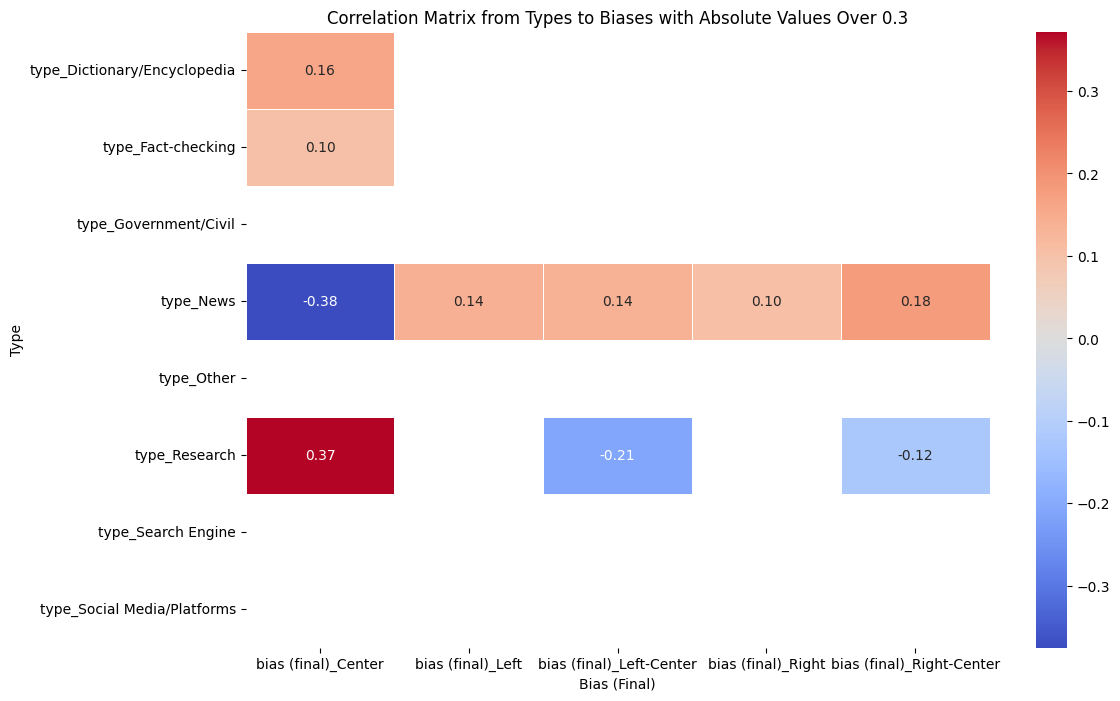

In [50]:
from sklearn.preprocessing import OneHotEncoder

bias_type_df = sources_with_bias[["type","bias (final)"]]

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(bias_type_df)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['type', 'bias (final)']))

type_columns = [col for col in encoded_df.columns if 'type' in col]
bias_columns = [col for col in encoded_df.columns if 'bias (final)' in col]

corr_types_biases = encoded_df[type_columns + bias_columns].corr(method='pearson').loc[type_columns, bias_columns]

mask = abs(corr_types_biases) < 0.1

plt.figure(figsize=(12, 8))
sns.heatmap(corr_types_biases, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, cbar=True, linewidths=0.5)
plt.title('Correlation Matrix from Types to Biases with Absolute Values Over 0.3')
plt.xlabel('Bias (Final)')
plt.ylabel('Type')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



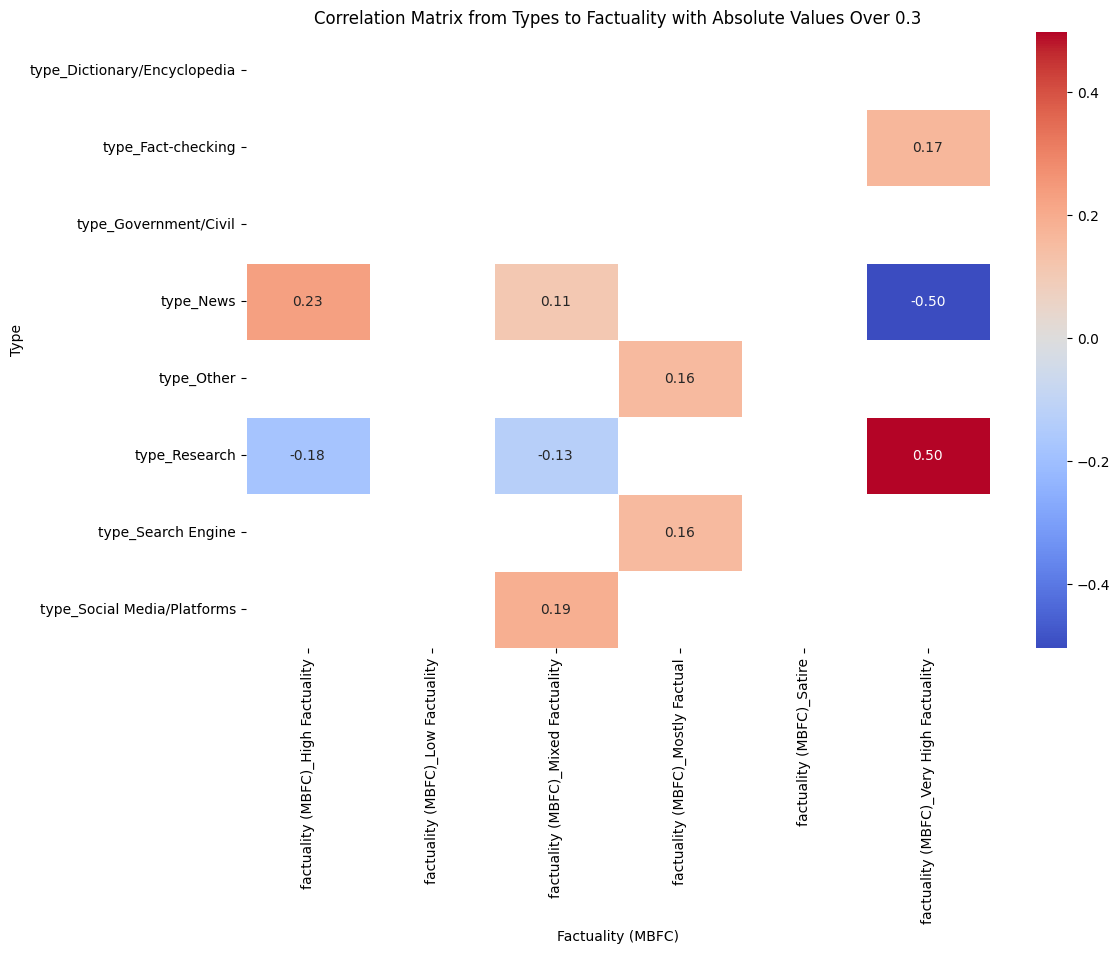

In [51]:
from sklearn.preprocessing import OneHotEncoder

bias_type_df = sources_with_bias[["type","factuality (MBFC)"]]

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(bias_type_df)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['type', "factuality (MBFC)"]))

type_columns = [col for col in encoded_df.columns if 'type' in col]
bias_columns = [col for col in encoded_df.columns if "factuality (MBFC)" in col]

corr_types_biases = encoded_df[type_columns + bias_columns].corr(method='pearson').loc[type_columns, bias_columns]

mask = abs(corr_types_biases) < 0.1

plt.figure(figsize=(12, 8))
sns.heatmap(corr_types_biases, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, cbar=True, linewidths=0.5)
plt.title('Correlation Matrix from Types to Factuality with Absolute Values Over 0.3')
plt.xlabel('Factuality (MBFC)')
plt.ylabel('Type')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



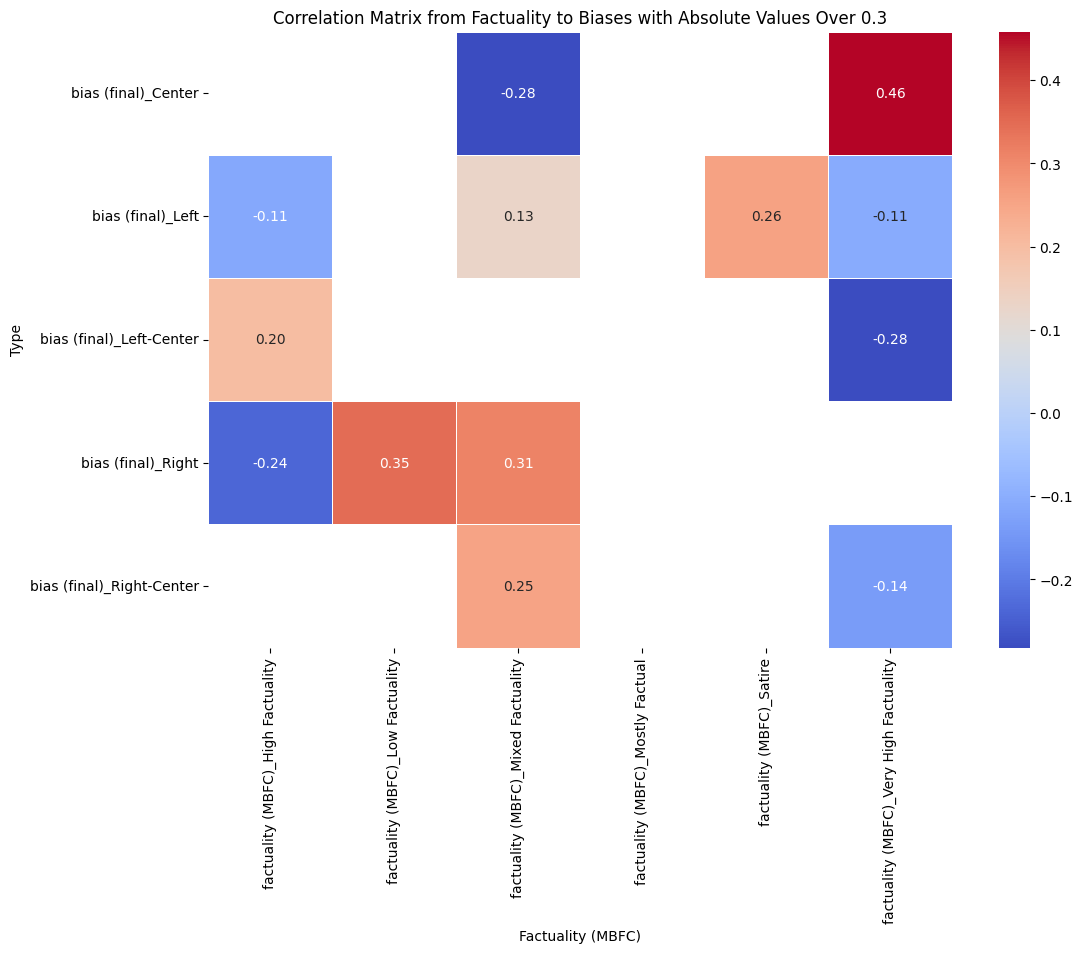

In [52]:
from sklearn.preprocessing import OneHotEncoder

bias_type_df = sources_with_bias[["bias (final)","factuality (MBFC)"]]

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(bias_type_df)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['bias (final)', "factuality (MBFC)"]))

type_columns = [col for col in encoded_df.columns if 'bias (final)' in col]
bias_columns = [col for col in encoded_df.columns if "factuality (MBFC)" in col]

corr_types_biases = encoded_df[type_columns + bias_columns].corr(method='pearson').loc[type_columns, bias_columns]

mask = abs(corr_types_biases) < 0.1

plt.figure(figsize=(12, 8))
sns.heatmap(corr_types_biases, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, cbar=True, linewidths=0.5)
plt.title('Correlation Matrix from Factuality to Biases with Absolute Values Over 0.3')
plt.xlabel('Factuality (MBFC)')
plt.ylabel('Type')
plt.show()